# 📊 Statistics for Machine Learning: A Beginner's Guide

Welcome to this interactive journey through statistics! This notebook is designed to make statistics easy and fun to understand, even if you're just starting out. We'll use real-world examples, colorful visualizations, and simple explanations to master the fundamentals of statistics for machine learning.

## 🎯 What You'll Learn:
1. **What is Statistics** and why it matters in daily life and ML
2. **Types of Statistics** (Descriptive vs Inferential)
3. **Population vs Sample** - Understanding the difference
4. **Measures of Central Tendency** (Mean, Median, Mode)
5. **Measures of Dispersion** (Range, Variance, Standard Deviation)
6. **Bessel's Correction** - Why we divide by (n-1)
7. **Standard Deviation** - Deep dive with visualizations

Let's begin this exciting journey! 🚀


In [89]:
# 📚 Let's import all the libraries we'll need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up nice plotting defaults
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("✅ All libraries loaded successfully!")
print("🎨 We're ready to create beautiful visualizations!")


✅ All libraries loaded successfully!
🎨 We're ready to create beautiful visualizations!


In [90]:
# Plotly rendering setup and nbformat check
import os
import plotly.io as pio

# Prefer VS Code renderer if available, else use notebook-connected, else browser
if 'VSCODE_PID' in os.environ:
    pio.renderers.default = 'vscode'
else:
    try:
        import IPython  # noqa: F401
        pio.renderers.default = 'notebook_connected'
    except Exception:
        pio.renderers.default = 'browser'

# Check nbformat availability/version and guide if needed
try:
    import nbformat  # noqa: F401
    from distutils.version import LooseVersion
    nbv = getattr(nbformat, '__version__', '0')
    if LooseVersion(nbv) < LooseVersion('4.2.0'):
        print("⚠️ nbformat < 4.2.0 detected. For rich Plotly output run: pip install --upgrade nbformat")
except Exception:
    print("⚠️ nbformat not found. For rich Plotly output run: pip install nbformat>=4.2.0")

print(f"Plotly renderer: {pio.renderers.default}")


⚠️ nbformat not found. For rich Plotly output run: pip install nbformat>=4.2.0
Plotly renderer: vscode


## 1. 🤔 What is Statistics?

### Think of Statistics as Your Data Detective! 🕵️

Statistics is like being a detective who looks at numbers and data to understand patterns, make predictions, and draw conclusions. Just like how a detective gathers clues to solve a mystery, statistics helps us gather and analyze data to understand the world around us.


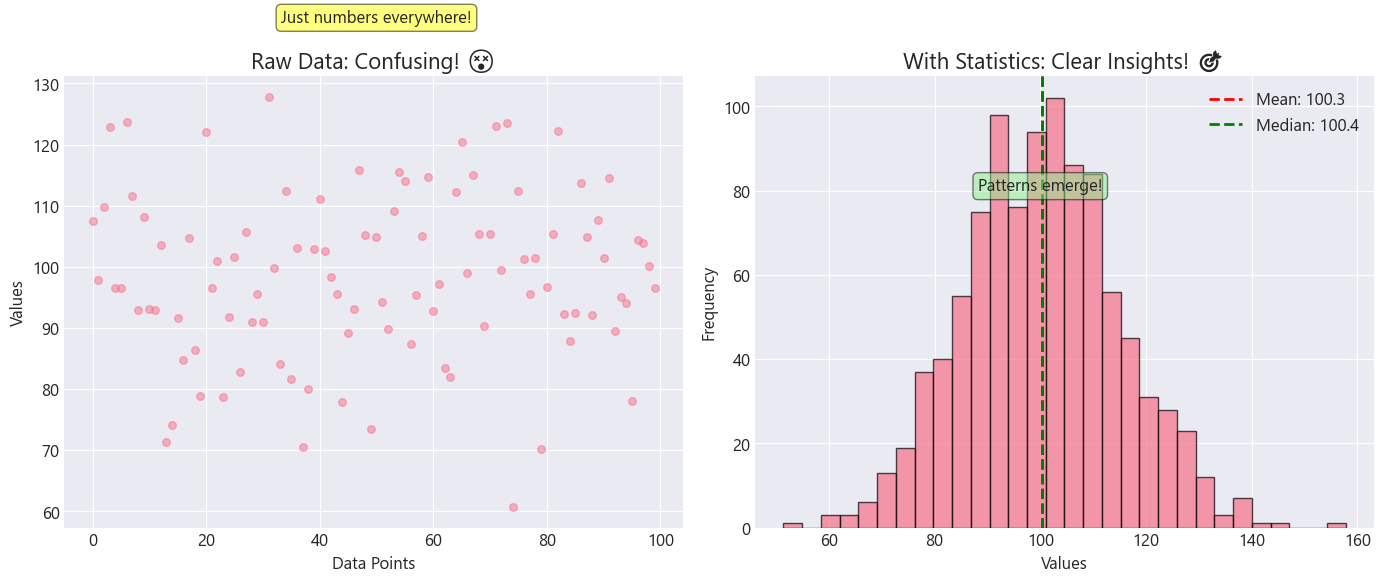

In [91]:
from matplotlib import font_manager, rcParams

import plotly.io as pio
pio.renderers.default = 'vscode'  # or 'vscode'

# Windows emoji font
font_manager.fontManager.addfont(r"C:\Windows\Fonts\seguiemj.ttf")
rcParams['font.family'] = 'Segoe UI Emoji'

# Let's create a visual representation of what statistics does!
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left side: Raw Data (Messy)
np.random.seed(42)
raw_data = np.random.normal(100, 15, 1000)
ax1.scatter(range(100), raw_data[:100], alpha=0.5, s=30)
ax1.set_title('Raw Data: Confusing! 😵', fontsize=16, fontweight='bold')
ax1.set_xlabel('Data Points')
ax1.set_ylabel('Values')
ax1.text(50, 140, 'Just numbers everywhere!', ha='center', fontsize=12, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.5))

# Right side: Statistical Summary (Clear)
ax2.hist(raw_data, bins=30, alpha=0.7, edgecolor='black')
ax2.axvline(np.mean(raw_data), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(raw_data):.1f}')
ax2.axvline(np.median(raw_data), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(raw_data):.1f}')
ax2.set_title('With Statistics: Clear Insights! 🎯', fontsize=16, fontweight='bold')
ax2.set_xlabel('Values')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.text(100, 80, 'Patterns emerge!', ha='center', fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.5))

plt.tight_layout()
plt.show()


### 🌟 Statistics in Daily Life

Statistics is everywhere! Let's look at some relatable examples:


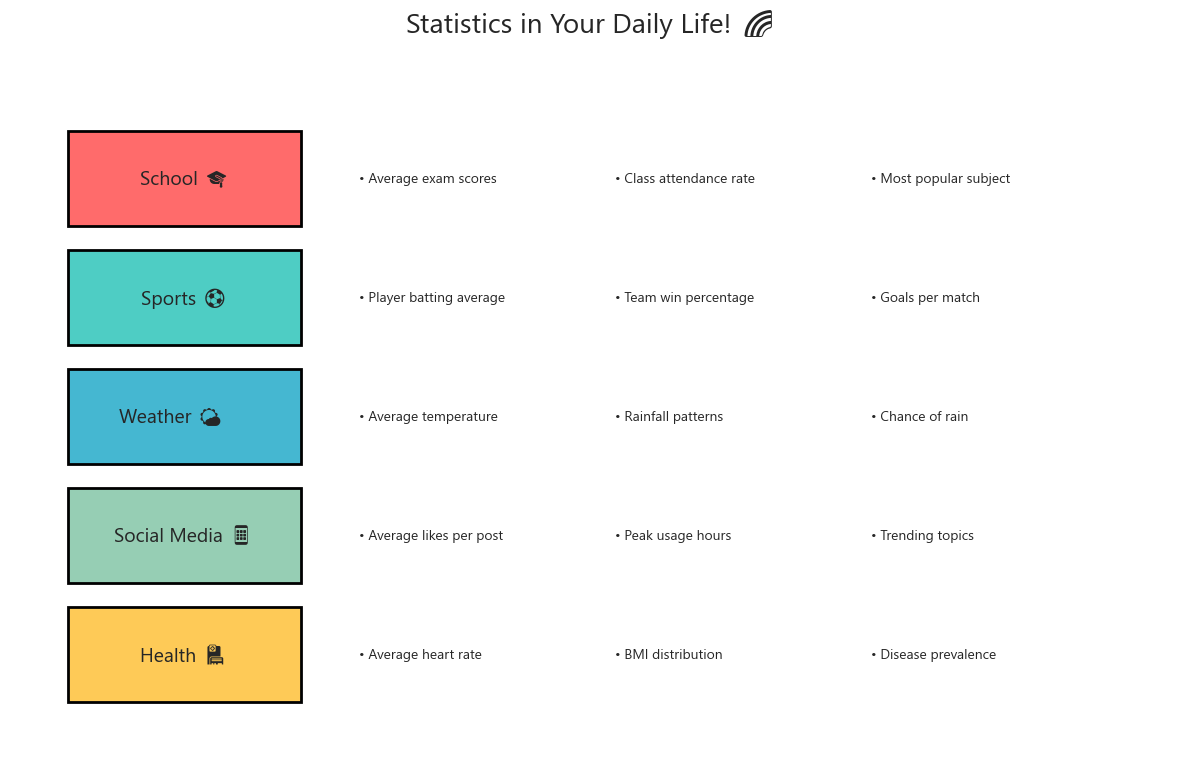

In [92]:

# Real-life examples of statistics
examples = {
    'School 🎓': ['Average exam scores', 'Class attendance rate', 'Most popular subject'],
    'Sports ⚽': ['Player batting average', 'Team win percentage', 'Goals per match'],
    'Weather 🌤️': ['Average temperature', 'Rainfall patterns', 'Chance of rain'],
    'Social Media 📱': ['Average likes per post', 'Peak usage hours', 'Trending topics'],
    'Health 🏥': ['Average heart rate', 'BMI distribution', 'Disease prevalence']
}

# Create a colorful infographic
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, len(examples) + 1)

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
y_positions = list(range(len(examples), 0, -1))

for i, (category, items) in enumerate(examples.items()):
    # Draw category box
    rect = plt.Rectangle((0.5, y_positions[i] - 0.4), 2, 0.8, 
                        facecolor=colors[i], edgecolor='black', linewidth=2)
    ax.add_patch(rect)
    ax.text(1.5, y_positions[i], category, fontsize=14, fontweight='bold', 
            va='center', ha='center')
    
    # Add examples
    for j, item in enumerate(items):
        ax.text(3 + j*2.2, y_positions[i], f'• {item}', fontsize=10, va='center')

ax.set_title('Statistics in Your Daily Life! 🌈', fontsize=20, fontweight='bold', pad=20)
ax.axis('off')
plt.tight_layout()
plt.show()


### 🤖 Statistics in Machine Learning

In Machine Learning, statistics is the foundation! Here's why:


In [93]:
# Create an interactive visualization showing statistics in ML
ml_applications = {
    'Data Understanding': 'Explore patterns, outliers, distributions',
    'Feature Engineering': 'Create meaningful features using statistical measures',
    'Model Evaluation': 'Assess model performance with statistical metrics',
    'Hypothesis Testing': 'Validate if results are significant or due to chance',
    'Predictions': 'Estimate uncertainty and confidence intervals'
}

# Create a circular diagram
fig = go.Figure()

# Add nodes
angle_step = 360 / len(ml_applications)
radius = 3

for i, (key, value) in enumerate(ml_applications.items()):
    angle = i * angle_step * np.pi / 180
    x = radius * np.cos(angle)
    y = radius * np.sin(angle)
    
    # Add connection to center
    fig.add_trace(go.Scatter(x=[0, x], y=[0, y], mode='lines',
                            line=dict(color='lightgray', width=2),
                            showlegend=False, hoverinfo='skip'))
    
    # Add node
    fig.add_trace(go.Scatter(x=[x], y=[y], mode='markers+text',
                            marker=dict(size=80, color=colors[i]),
                            text=[key], textposition='middle center',
                            textfont=dict(size=12, color='white', family='Arial Black'),
                            hovertext=[value], hoverinfo='text',
                            showlegend=False))

# Add center node
fig.add_trace(go.Scatter(x=[0], y=[0], mode='markers+text',
                        marker=dict(size=100, color='darkblue'),
                        text=['Statistics<br>in ML'], textposition='middle center',
                        textfont=dict(size=14, color='white', family='Arial Black'),
                        showlegend=False, hoverinfo='skip'))

fig.update_layout(
    title='How Statistics Powers Machine Learning 🚀',
    title_font_size=20,
    showlegend=False,
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    width=800, height=600,
    plot_bgcolor='white'
)

fig.show()


### 📝 Practice Exercise 1: Statistics Around You

**Your Turn!** Think about your daily routine and identify 3 situations where you encounter statistics. Write them down and think about what kind of data is being collected and analyzed.


In [94]:
# Example answer (replace with your own!)
my_daily_statistics = {
    "Morning ☕": "Average time to get ready: 45 minutes",
    "Social Media 📱": "Average screen time: 2 hours per day", 
    "Study Time 📚": "Average pages read per day: 30 pages"
}

for time, stat in my_daily_statistics.items():
    print(f"{time}: {stat}")


Morning ☕: Average time to get ready: 45 minutes
Social Media 📱: Average screen time: 2 hours per day
Study Time 📚: Average pages read per day: 30 pages


## 2. 📊 Types of Statistics: Descriptive vs Inferential

Think of statistics as having two main superpowers:


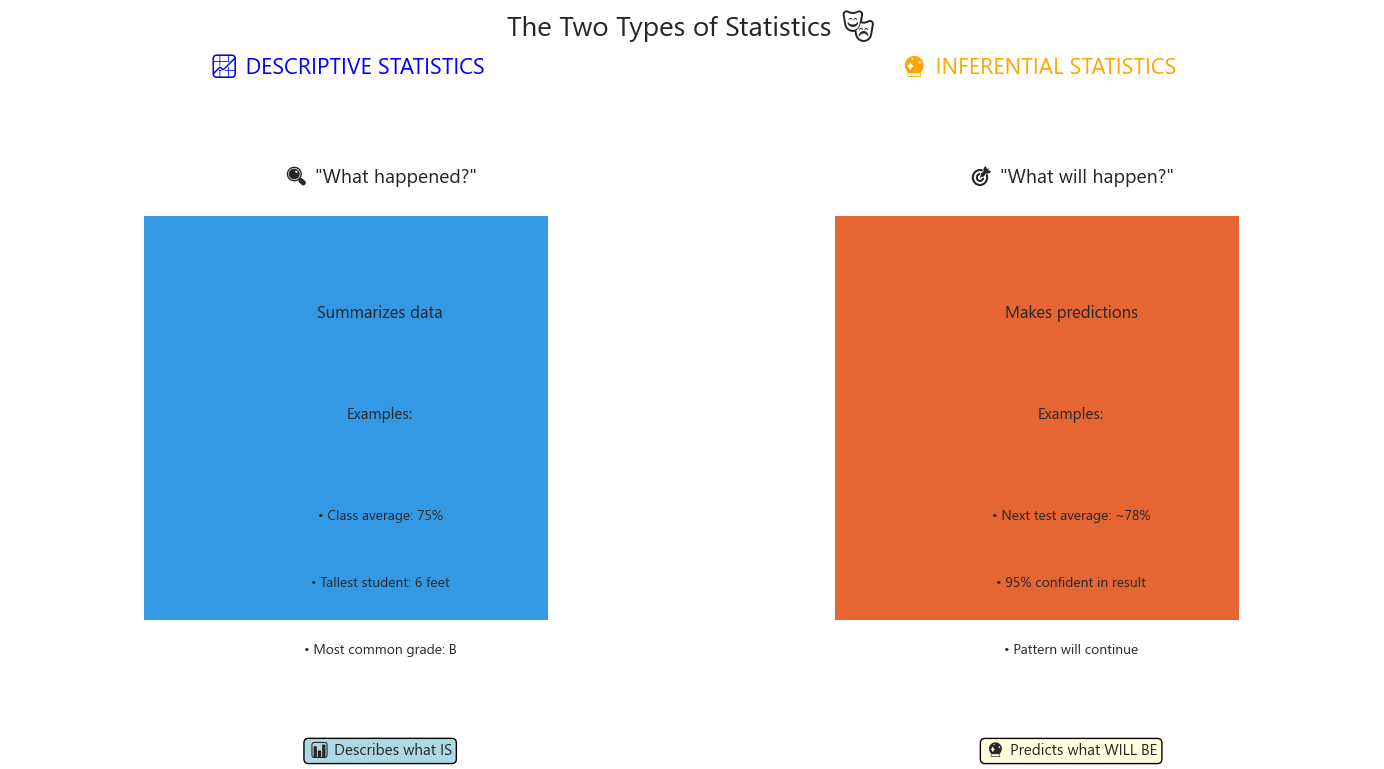

In [95]:
# Create a visual comparison of Descriptive vs Inferential Statistics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Descriptive Statistics
desc_image = np.ones((10, 10, 3))
desc_image[2:8, 2:8] = [0.2, 0.6, 0.9]  # Blue center
ax1.imshow(desc_image)
ax1.set_title('📈 DESCRIPTIVE STATISTICS', fontsize=16, fontweight='bold', color='blue')
ax1.text(5, 1, '🔍 "What happened?"', ha='center', fontsize=14, fontweight='bold')
ax1.text(5, 3, 'Summarizes data', ha='center', fontsize=12)
ax1.text(5, 4.5, 'Examples:', ha='center', fontsize=11, style='italic')
ax1.text(5, 6, '• Class average: 75%', ha='center', fontsize=10)
ax1.text(5, 7, '• Tallest student: 6 feet', ha='center', fontsize=10)
ax1.text(5, 8, '• Most common grade: B', ha='center', fontsize=10)
ax1.text(5, 9.5, '📊 Describes what IS', ha='center', fontsize=11, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
ax1.axis('off')

# Inferential Statistics  
inf_image = np.ones((10, 10, 3))
inf_image[2:8, 2:8] = [0.9, 0.4, 0.2]  # Orange center
ax2.imshow(inf_image)
ax2.set_title('🔮 INFERENTIAL STATISTICS', fontsize=16, fontweight='bold', color='orange')
ax2.text(5, 1, '🎯 "What will happen?"', ha='center', fontsize=14, fontweight='bold')
ax2.text(5, 3, 'Makes predictions', ha='center', fontsize=12)
ax2.text(5, 4.5, 'Examples:', ha='center', fontsize=11, style='italic')
ax2.text(5, 6, '• Next test average: ~78%', ha='center', fontsize=10)
ax2.text(5, 7, '• 95% confident in result', ha='center', fontsize=10)
ax2.text(5, 8, '• Pattern will continue', ha='center', fontsize=10)
ax2.text(5, 9.5, '🔮 Predicts what WILL BE', ha='center', fontsize=11,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))
ax2.axis('off')

plt.suptitle('The Two Types of Statistics 🎭', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


### Let's see this with a real example: Student Test Scores 📚


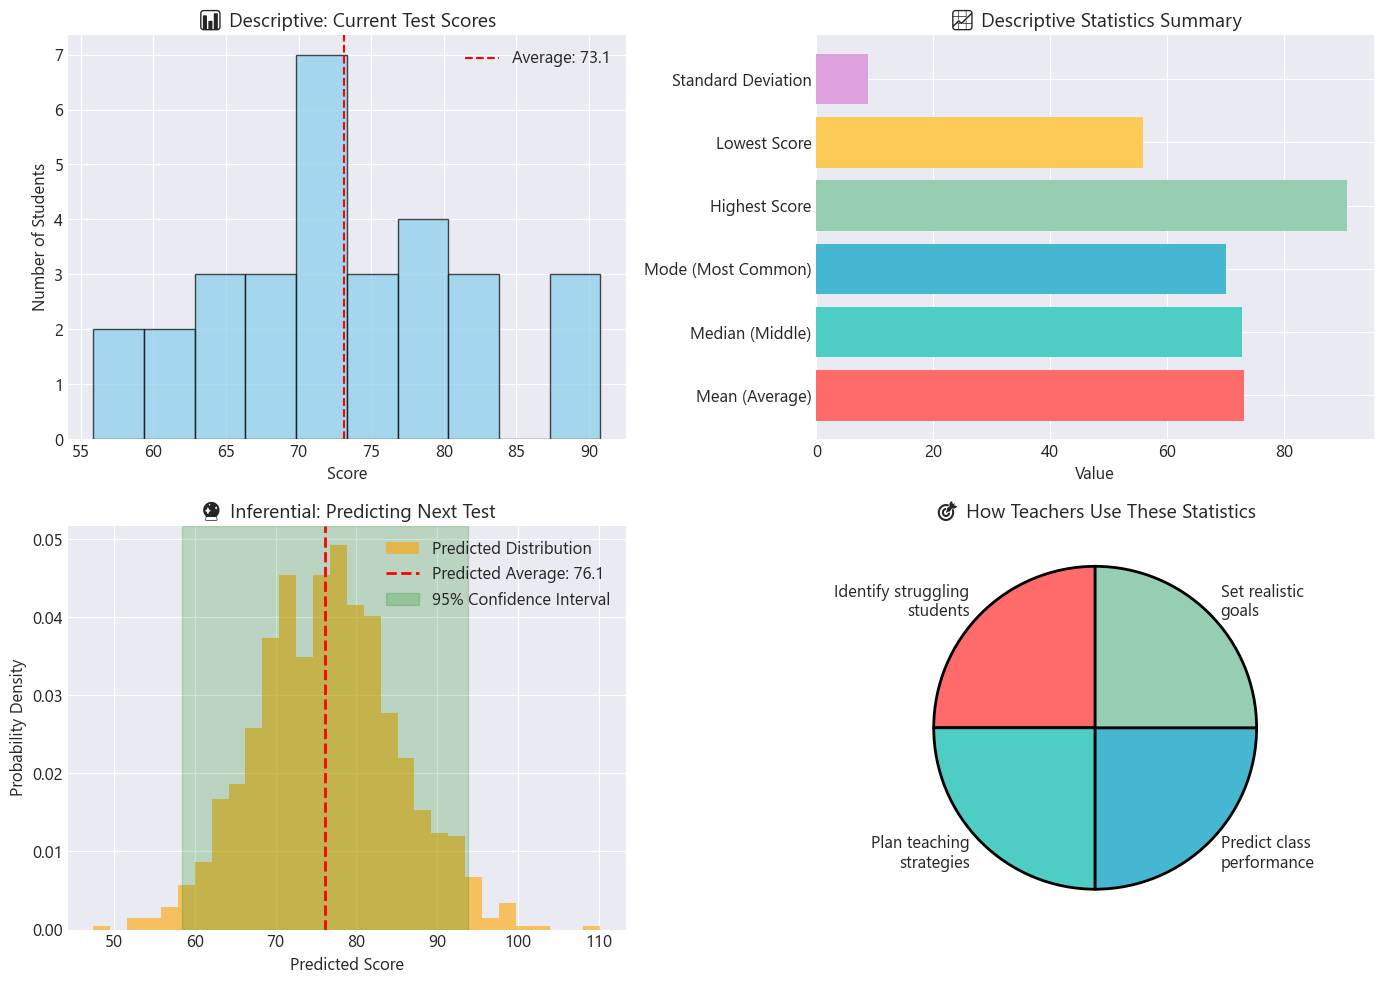

In [96]:
# Generate sample test scores for a class
np.random.seed(42)
test_scores = np.random.normal(75, 10, 30)  # 30 students, average ~75, std ~10
test_scores = np.clip(test_scores, 40, 100)  # Keep scores between 40-100

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Descriptive: Show the actual data
ax1 = axes[0, 0]
ax1.hist(test_scores, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_title('📊 Descriptive: Current Test Scores', fontsize=14, fontweight='bold')
ax1.set_xlabel('Score')
ax1.set_ylabel('Number of Students')
ax1.axvline(np.mean(test_scores), color='red', linestyle='--', 
            label=f'Average: {np.mean(test_scores):.1f}')
ax1.legend()

# 2. Descriptive: Summary statistics
ax2 = axes[0, 1]
mode_value = pd.Series(np.round(test_scores)).mode().iloc[0]
stats_data = {
    'Mean (Average)': f'{np.mean(test_scores):.1f}',
    'Median (Middle)': f'{np.median(test_scores):.1f}',
    'Mode (Most Common)': f'{mode_value:.0f}',
    'Highest Score': f'{np.max(test_scores):.1f}',
    'Lowest Score': f'{np.min(test_scores):.1f}',
    'Standard Deviation': f'{np.std(test_scores):.1f}'
}
y_pos = np.arange(len(stats_data))
ax2.barh(y_pos, [float(v.split()[0]) for v in stats_data.values()], 
         color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#DDA0DD'])
ax2.set_yticks(y_pos)
ax2.set_yticklabels(stats_data.keys())
ax2.set_title('📈 Descriptive Statistics Summary', fontsize=14, fontweight='bold')
ax2.set_xlabel('Value')

# 3. Inferential: Predict future performance
ax3 = axes[1, 0]
# Simulate predictions with confidence intervals
future_mean = np.mean(test_scores) + 3  # Assume slight improvement
future_scores = np.random.normal(future_mean, np.std(test_scores), 1000)
ax3.hist(future_scores, bins=30, alpha=0.6, color='orange', density=True, 
         label='Predicted Distribution')
ax3.axvline(future_mean, color='red', linestyle='--', linewidth=2,
            label=f'Predicted Average: {future_mean:.1f}')
ax3.axvspan(future_mean - 2*np.std(test_scores), 
            future_mean + 2*np.std(test_scores), 
            alpha=0.2, color='green', label='95% Confidence Interval')
ax3.set_title('🔮 Inferential: Predicting Next Test', fontsize=14, fontweight='bold')
ax3.set_xlabel('Predicted Score')
ax3.set_ylabel('Probability Density')
ax3.legend()

# 4. Real world application
ax4 = axes[1, 1]
applications = ['Identify struggling\nstudents', 'Plan teaching\nstrategies', 
                'Predict class\nperformance', 'Set realistic\ngoals']
colors_app = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
ax4.pie([1, 1, 1, 1], labels=applications, colors=colors_app, autopct='',
        startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 2})
ax4.set_title('🎯 How Teachers Use These Statistics', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


### 📝 Practice Exercise 2: Descriptive vs Inferential

Given the following scenario, identify whether each statement uses **descriptive** or **inferential** statistics:


In [97]:
# Practice: Identify the type of statistics
statements = [
    "1. The average height of students in your class is 5.5 feet",
    "2. Based on past data, next year's rainfall will likely be 850mm",
    "3. 60% of students passed the math exam",
    "4. We predict with 90% confidence that sales will increase",
    "5. The most popular ice cream flavor last month was chocolate"
]

print("🤔 Which type of statistics is each statement using?\n")
for statement in statements:
    print(f"{statement}")
    print("   Your answer: _____________\n")

# Reveal answers
print("\n" + "="*50)
print("✅ ANSWERS:")
print("1. Descriptive (describing current class data)")
print("2. Inferential (predicting future based on past)")
print("3. Descriptive (summarizing exam results)")
print("4. Inferential (making predictions with confidence)")
print("5. Descriptive (reporting past data)")


🤔 Which type of statistics is each statement using?

1. The average height of students in your class is 5.5 feet
   Your answer: _____________

2. Based on past data, next year's rainfall will likely be 850mm
   Your answer: _____________

3. 60% of students passed the math exam
   Your answer: _____________

4. We predict with 90% confidence that sales will increase
   Your answer: _____________

5. The most popular ice cream flavor last month was chocolate
   Your answer: _____________


✅ ANSWERS:
1. Descriptive (describing current class data)
2. Inferential (predicting future based on past)
3. Descriptive (summarizing exam results)
4. Inferential (making predictions with confidence)
5. Descriptive (reporting past data)


## 3. 🌍 Population vs Sample

Imagine you want to know the average height of ALL students in your country. That's millions of students! 😱 

This is where the concept of **Population** and **Sample** comes in.


In [98]:
# Create an interactive visualization of Population vs Sample
fig = go.Figure()

# Population (large circle)
theta = np.linspace(0, 2*np.pi, 100)
r_pop = 4
x_pop = r_pop * np.cos(theta)
y_pop = r_pop * np.sin(theta)

fig.add_trace(go.Scatter(x=x_pop, y=y_pop, fill='toself',
                        fillcolor='rgba(135, 206, 250, 0.3)',
                        line=dict(color='blue', width=3),
                        name='Population',
                        hovertext='All individuals in the group'))

# Add population dots
np.random.seed(42)
n_pop_dots = 200
angles = np.random.uniform(0, 2*np.pi, n_pop_dots)
radii = np.random.uniform(0, r_pop-0.5, n_pop_dots)
x_dots = radii * np.cos(angles)
y_dots = radii * np.sin(angles)

fig.add_trace(go.Scatter(x=x_dots, y=y_dots, mode='markers',
                        marker=dict(size=5, color='lightblue'),
                        name='Individuals',
                        showlegend=False))

# Sample (small circle inside)
r_sample = 1.5
x_sample = r_sample * np.cos(theta) + 1.5
y_sample = r_sample * np.sin(theta) + 0

fig.add_trace(go.Scatter(x=x_sample, y=y_sample, fill='toself',
                        fillcolor='rgba(255, 165, 0, 0.5)',
                        line=dict(color='orange', width=3),
                        name='Sample',
                        hovertext='Selected subset'))

# Add sample dots
sample_indices = np.random.choice(len(x_dots), 30, replace=False)
fig.add_trace(go.Scatter(x=x_dots[sample_indices], y=y_dots[sample_indices], 
                        mode='markers',
                        marker=dict(size=10, color='orange', line=dict(color='red', width=2)),
                        name='Sample points',
                        showlegend=False))

# Add annotations
fig.add_annotation(x=0, y=-5.5, text="<b>POPULATION</b><br>Everyone we want to study<br>(e.g., All students in the country)",
                  showarrow=False, font=dict(size=14, color='blue'),
                  bgcolor='rgba(135, 206, 250, 0.2)', bordercolor='blue', borderwidth=2)

fig.add_annotation(x=1.5, y=2.5, text="<b>SAMPLE</b><br>A subset we actually study<br>(e.g., 1000 random students)",
                  showarrow=False, font=dict(size=12, color='orange'),
                  bgcolor='rgba(255, 165, 0, 0.2)', bordercolor='orange', borderwidth=2)

# Add arrow
fig.add_annotation(x=1, y=-0.5, ax=0, ay=-2,
                  xref='x', yref='y', axref='x', ayref='y',
                  showarrow=True, arrowhead=2, arrowsize=2,
                  arrowwidth=2, arrowcolor='green')

fig.update_layout(
    title='Population vs Sample: The Big Picture 🎯',
    title_font_size=20,
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False, range=[-6, 6]),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False, range=[-6, 5]),
    width=800, height=600,
    plot_bgcolor='white',
    showlegend=True
)

fig.show()


### 🎯 Why Do We Use Samples?

Let's understand this with a practical example:


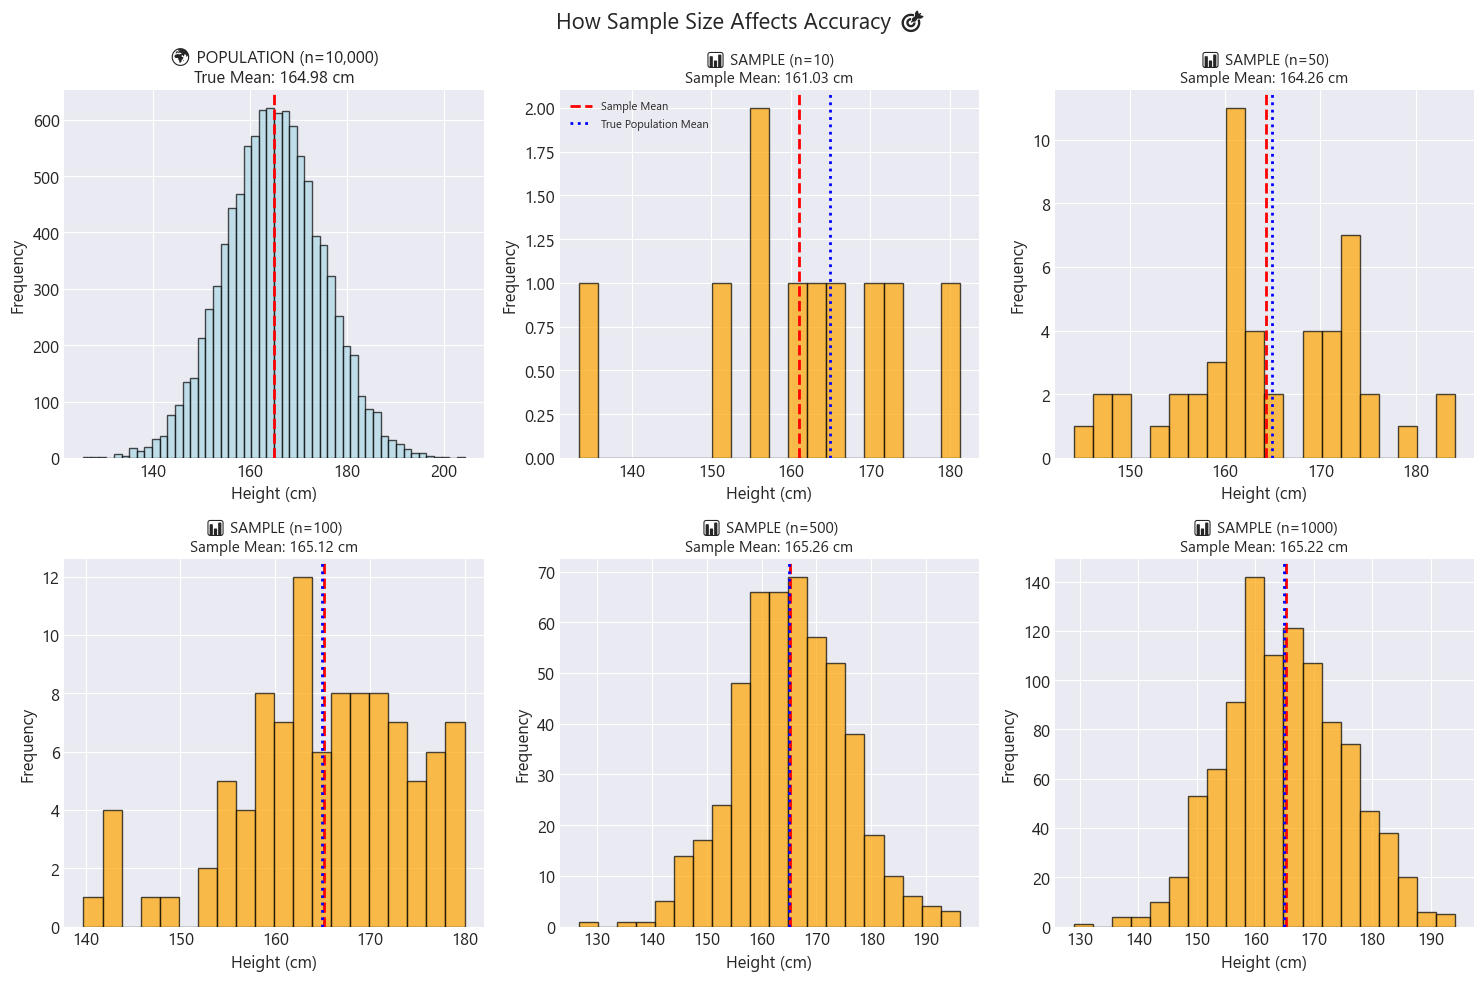

🎯 Sample Mean Accuracy (difference from population mean):
Sample size   10: Error = 3.949 cm
Sample size   50: Error = 0.723 cm
Sample size  100: Error = 0.140 cm
Sample size  500: Error = 0.277 cm
Sample size 1000: Error = 0.245 cm

✨ Notice: Larger samples give more accurate estimates!


In [99]:
# Let's simulate a population and sampling scenario
np.random.seed(42)

# Create a population of 10,000 students' heights (in cm)
population_heights = np.random.normal(165, 10, 10000)

# Take different sample sizes
sample_sizes = [10, 50, 100, 500, 1000]
sample_means = []

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot population
axes[0].hist(population_heights, bins=50, color='lightblue', edgecolor='black', alpha=0.7)
axes[0].axvline(np.mean(population_heights), color='red', linestyle='--', linewidth=2)
axes[0].set_title(f'🌍 POPULATION (n=10,000)\nTrue Mean: {np.mean(population_heights):.2f} cm', 
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Height (cm)')
axes[0].set_ylabel('Frequency')

# Plot samples
for i, size in enumerate(sample_sizes):
    sample = np.random.choice(population_heights, size, replace=False)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
    
    axes[i+1].hist(sample, bins=20, color='orange', edgecolor='black', alpha=0.7)
    axes[i+1].axvline(sample_mean, color='red', linestyle='--', linewidth=2)
    axes[i+1].axvline(np.mean(population_heights), color='blue', linestyle=':', linewidth=2)
    axes[i+1].set_title(f'📊 SAMPLE (n={size})\nSample Mean: {sample_mean:.2f} cm', 
                        fontsize=11, fontweight='bold')
    axes[i+1].set_xlabel('Height (cm)')
    axes[i+1].set_ylabel('Frequency')
    
    # Add legend
    if i == 0:
        axes[i+1].legend(['Sample Mean', 'True Population Mean'], fontsize=8)

plt.suptitle('How Sample Size Affects Accuracy 🎯', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Show accuracy improvement
print("🎯 Sample Mean Accuracy (difference from population mean):")
print("="*50)
for size, mean in zip(sample_sizes, sample_means):
    error = abs(mean - np.mean(population_heights))
    print(f"Sample size {size:4d}: Error = {error:.3f} cm")
print("\n✨ Notice: Larger samples give more accurate estimates!")


### 📊 Key Differences: Population vs Sample


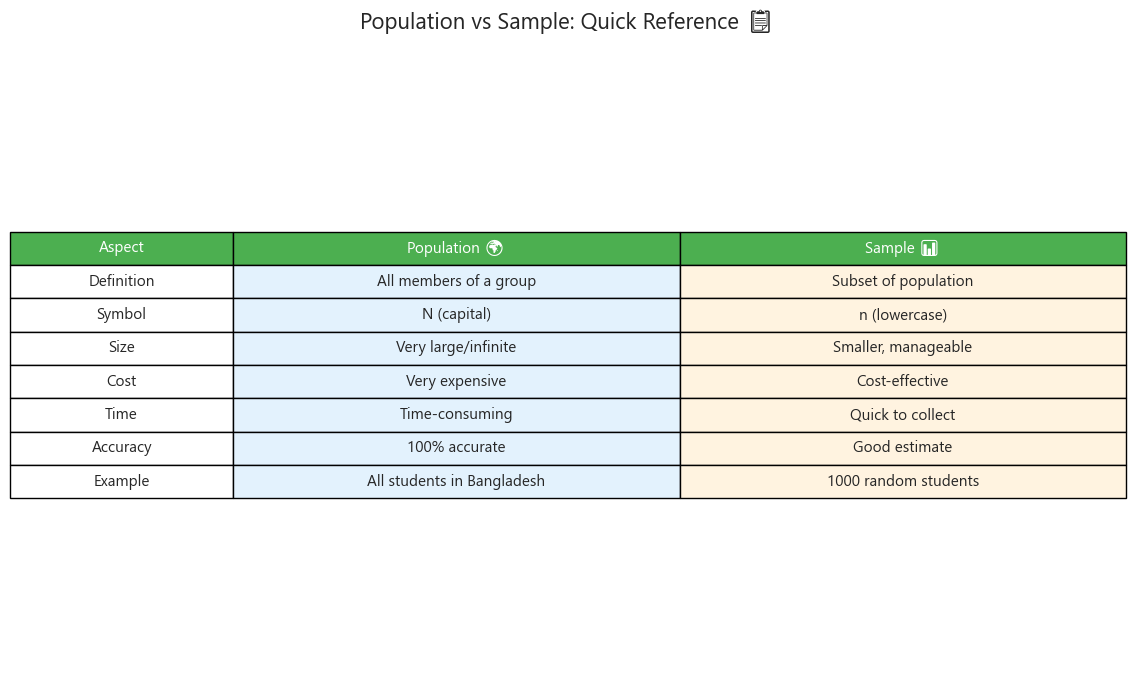

In [100]:
# Create a comparison table
comparison_data = {
    'Aspect': ['Definition', 'Symbol', 'Size', 'Cost', 'Time', 'Accuracy', 'Example'],
    'Population 🌍': [
        'All members of a group',
        'N (capital)',
        'Very large/infinite',
        'Very expensive',
        'Time-consuming',
        '100% accurate',
        'All students in Bangladesh'
    ],
    'Sample 📊': [
        'Subset of population',
        'n (lowercase)',
        'Smaller, manageable',
        'Cost-effective',
        'Quick to collect',
        'Good estimate',
        '1000 random students'
    ]
}

# Create visual comparison
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

# Create table
table_data = []
for i in range(len(comparison_data['Aspect'])):
    row = [comparison_data[col][i] for col in comparison_data.keys()]
    table_data.append(row)

table = ax.table(cellText=table_data, colLabels=list(comparison_data.keys()),
                cellLoc='center', loc='center',
                colWidths=[0.2, 0.4, 0.4])

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 2)

# Color the header
for i in range(len(comparison_data.keys())):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Color Population column
for i in range(1, len(comparison_data['Aspect']) + 1):
    table[(i, 1)].set_facecolor('#E3F2FD')
    
# Color Sample column
for i in range(1, len(comparison_data['Aspect']) + 1):
    table[(i, 2)].set_facecolor('#FFF3E0')

plt.title('Population vs Sample: Quick Reference 📋', fontsize=16, fontweight='bold', pad=20)
plt.show()


### 📝 Practice Exercise 3: Population or Sample?

Identify whether each scenario describes a **population** or a **sample**:


In [101]:
# Practice scenarios
scenarios = [
    "Testing 100 phones from a factory that produces 10,000 phones daily",
    "Measuring the height of every player in your school basketball team",
    "Checking 50 random customers' satisfaction from a store with 5000 customers",
    "Counting all the trees in your backyard",
    "Surveying 1000 voters before an election with millions of voters"
]

print("🤔 Is it a Population or Sample?\n")
for i, scenario in enumerate(scenarios, 1):
    print(f"{i}. {scenario}")
    print("   Your answer: _____________\n")

# Interactive reveal
print("\n" + "="*60)
print("✅ ANSWERS:")
answers = [
    "Sample (100 out of 10,000)",
    "Population (all team members)",
    "Sample (50 out of 5000)",
    "Population (all trees)",
    "Sample (1000 out of millions)"
]
for i, answer in enumerate(answers, 1):
    print(f"{i}. {answer}")


🤔 Is it a Population or Sample?

1. Testing 100 phones from a factory that produces 10,000 phones daily
   Your answer: _____________

2. Measuring the height of every player in your school basketball team
   Your answer: _____________

3. Checking 50 random customers' satisfaction from a store with 5000 customers
   Your answer: _____________

4. Counting all the trees in your backyard
   Your answer: _____________

5. Surveying 1000 voters before an election with millions of voters
   Your answer: _____________


✅ ANSWERS:
1. Sample (100 out of 10,000)
2. Population (all team members)
3. Sample (50 out of 5000)
4. Population (all trees)
5. Sample (1000 out of millions)


## 4. 📏 Measures of Central Tendency

Central tendency tells us about the **"center"** or **"typical value"** of our data. It's like finding the most representative person in a group!

We have three main heroes here:
- **Mean** (Average) 🎯
- **Median** (Middle value) 🏃
- **Mode** (Most common) 🏆


📊 Class Test Scores: [65, 70, 70, 75, 75, 75, 80, 80, 85, 85, 85, 90, 95, 95, 100]

🎯 Mean (Average): 81.7
🏃 Median (Middle): 80.0
🏆 Mode (Most Common): 75.0


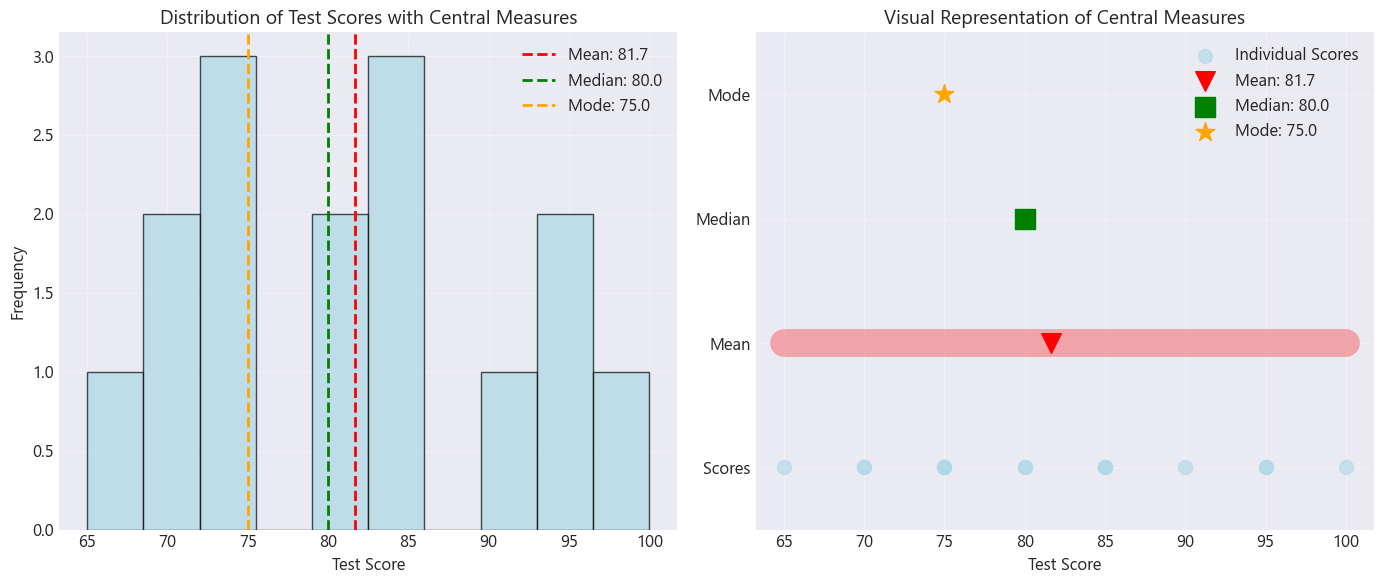

In [102]:

# Let's understand with a real example: Test scores of 15 students
test_scores = [65, 70, 70, 75, 75, 75, 80, 80, 85, 85, 85, 90, 95, 95, 100]

# Calculate the three measures
mean_score = np.mean(test_scores)
median_score = np.median(test_scores)
mode_score = stats.mode(test_scores, keepdims=True).mode[0]

print("📊 Class Test Scores:", test_scores)
print(f"\n🎯 Mean (Average): {mean_score:.1f}")
print(f"🏃 Median (Middle): {median_score:.1f}")
print(f"🏆 Mode (Most Common): {mode_score:.1f}")

# Visualize the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left plot: Histogram with measures
ax1.hist(test_scores, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
ax1.axvline(mean_score, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_score:.1f}')
ax1.axvline(median_score, color='green', linestyle='--', linewidth=2, label=f'Median: {median_score:.1f}')
ax1.axvline(mode_score, color='orange', linestyle='--', linewidth=2, label=f'Mode: {mode_score:.1f}')
ax1.set_xlabel('Test Score')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Test Scores with Central Measures', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Right plot: Visual representation of each measure
ax2.scatter(test_scores, [1]*len(test_scores), s=100, alpha=0.6, color='lightblue', label='Individual Scores')

# Show mean calculation visually
ax2.plot([min(test_scores), max(test_scores)], [2, 2], 'r-', alpha=0.3, linewidth=20)
ax2.scatter([mean_score], [2], s=200, color='red', marker='v', label=f'Mean: {mean_score:.1f}', zorder=5)

# Show median
sorted_scores = sorted(test_scores)
ax2.scatter([sorted_scores[len(sorted_scores)//2]], [3], s=200, color='green', 
           marker='s', label=f'Median: {median_score:.1f}', zorder=5)

# Show mode
ax2.scatter([mode_score], [4], s=200, color='orange', marker='*', 
           label=f'Mode: {mode_score:.1f}', zorder=5)

ax2.set_ylim(0.5, 4.5)
ax2.set_xlabel('Test Score')
ax2.set_yticks([1, 2, 3, 4])
ax2.set_yticklabels(['Scores', 'Mean', 'Median', 'Mode'])
ax2.set_title('Visual Representation of Central Measures', fontsize=14, fontweight='bold')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 🎯 Mean (Average)

The **mean** is what most people call the "average". It's calculated by adding all values and dividing by the count.

**Formula:** Mean = (Sum of all values) / (Number of values)


Step 1 - Add all scores: 70 + 85 + 90 + 75 + 80 = 400
Step 2 - Count the scores: 5
Step 3 - Divide: 400 ÷ 5 = 80.0

✅ Verification with NumPy: 80.0


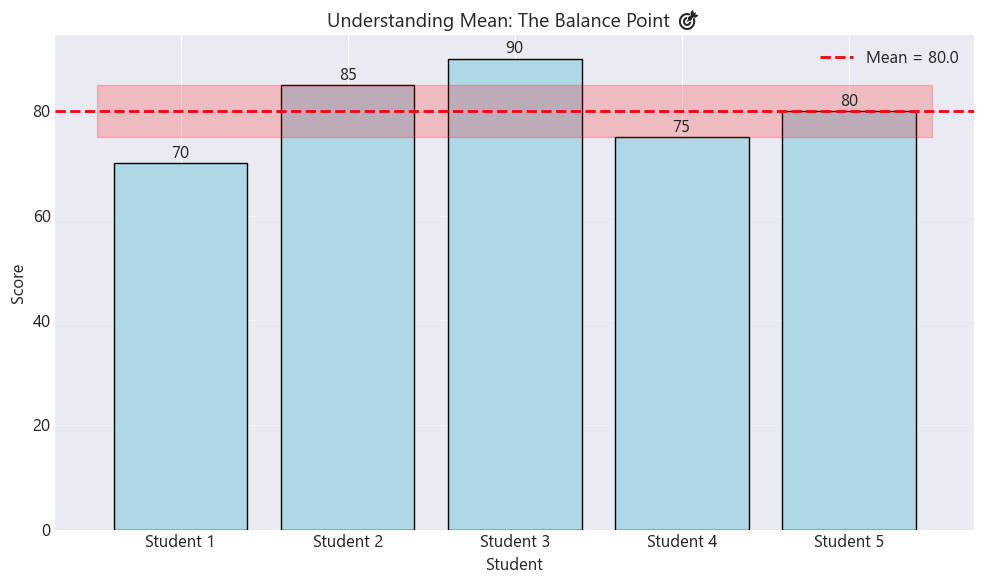

In [103]:
# Let's calculate mean step by step
scores = [70, 85, 90, 75, 80]

# Step 1: Add all scores
total = sum(scores)
print(f"Step 1 - Add all scores: {' + '.join(map(str, scores))} = {total}")

# Step 2: Count the scores
count = len(scores)
print(f"Step 2 - Count the scores: {count}")

# Step 3: Divide
mean = total / count
print(f"Step 3 - Divide: {total} ÷ {count} = {mean}")

# Verify with numpy
print(f"\n✅ Verification with NumPy: {np.mean(scores)}")

# Visual representation
fig, ax = plt.subplots(figsize=(10, 6))

# Plot individual scores
x_pos = np.arange(len(scores))
bars = ax.bar(x_pos, scores, color='lightblue', edgecolor='black')

# Add value labels on bars
for i, (bar, score) in enumerate(zip(bars, scores)):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
            str(score), ha='center', fontweight='bold')

# Show mean line
ax.axhline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean}')
ax.fill_between([-0.5, len(scores)-0.5], mean-5, mean+5, alpha=0.2, color='red')

ax.set_xlabel('Student', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Understanding Mean: The Balance Point 🎯', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels([f'Student {i+1}' for i in range(len(scores))])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


### 🏃 Median (Middle Value)

The **median** is the middle value when data is arranged in order. It's like finding the person standing in the middle of a line!


📏 Example 1 - Heights (Odd number): [160, 165, 170, 175, 180]
Median = 170.0 cm (middle value)

📏 Example 2 - Heights (Even number): [160, 165, 170, 175, 180, 185]
Median = 172.5 cm (average of two middle values)
Calculation: (170 + 175) / 2 = 172.5


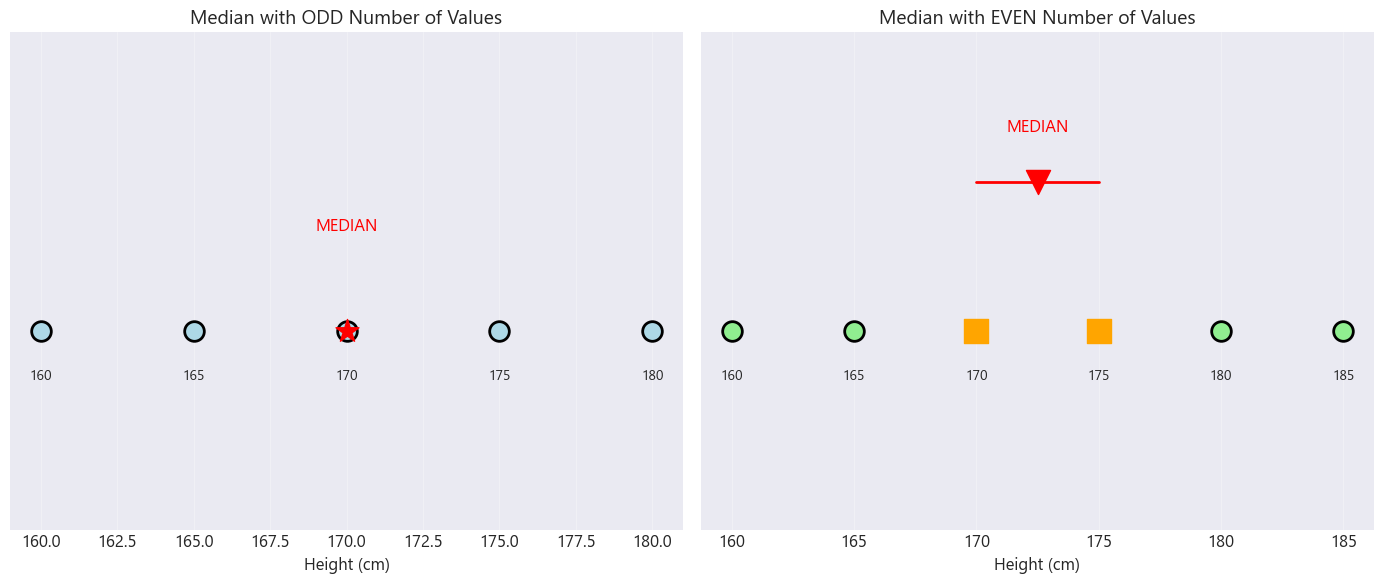

In [104]:
# Understanding Median with two examples
# Example 1: Odd number of values
heights_odd = [160, 165, 170, 175, 180]
print("📏 Example 1 - Heights (Odd number):", heights_odd)
print(f"Median = {np.median(heights_odd)} cm (middle value)\n")

# Example 2: Even number of values  
heights_even = [160, 165, 170, 175, 180, 185]
print("📏 Example 2 - Heights (Even number):", heights_even)
print(f"Median = {np.median(heights_even)} cm (average of two middle values)")
print(f"Calculation: (170 + 175) / 2 = {(170 + 175) / 2}")

# Visualize both cases
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Odd number visualization
ax1.scatter(heights_odd, [1]*len(heights_odd), s=200, c='lightblue', edgecolor='black', linewidth=2)
ax1.scatter([heights_odd[2]], [1], s=300, c='red', marker='*', zorder=5)
ax1.text(heights_odd[2], 1.1, 'MEDIAN', ha='center', fontweight='bold', color='red')
for i, h in enumerate(heights_odd):
    ax1.text(h, 0.95, str(h), ha='center', fontsize=10)
ax1.set_ylim(0.8, 1.3)
ax1.set_xlabel('Height (cm)')
ax1.set_title('Median with ODD Number of Values', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')
ax1.set_yticks([])

# Even number visualization
ax2.scatter(heights_even, [1]*len(heights_even), s=200, c='lightgreen', edgecolor='black', linewidth=2)
ax2.scatter([heights_even[2], heights_even[3]], [1, 1], s=300, c='orange', marker='s', zorder=5)
ax2.plot([heights_even[2], heights_even[3]], [1.15, 1.15], 'r-', linewidth=2)
ax2.scatter([(heights_even[2] + heights_even[3])/2], [1.15], s=300, c='red', marker='v', zorder=6)
ax2.text((heights_even[2] + heights_even[3])/2, 1.2, 'MEDIAN', ha='center', fontweight='bold', color='red')
for i, h in enumerate(heights_even):
    ax2.text(h, 0.95, str(h), ha='center', fontsize=10)
ax2.set_ylim(0.8, 1.3)
ax2.set_xlabel('Height (cm)')
ax2.set_title('Median with EVEN Number of Values', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')
ax2.set_yticks([])

plt.tight_layout()
plt.show()


### 🏆 Mode (Most Common Value)

The **mode** is the value that appears most frequently. Think of it as the most popular choice!


🎨 Students' Favorite Colors: ['Blue', 'Red', 'Blue', 'Green', 'Blue', 'Red', 'Yellow', 'Blue', 'Green', 'Blue']

🏆 Mode (Most Popular): Blue

Color Counts:
  Blue: ⭐⭐⭐⭐⭐ (5)
  Red: ⭐⭐ (2)
  Green: ⭐⭐ (2)
  Yellow: ⭐ (1)


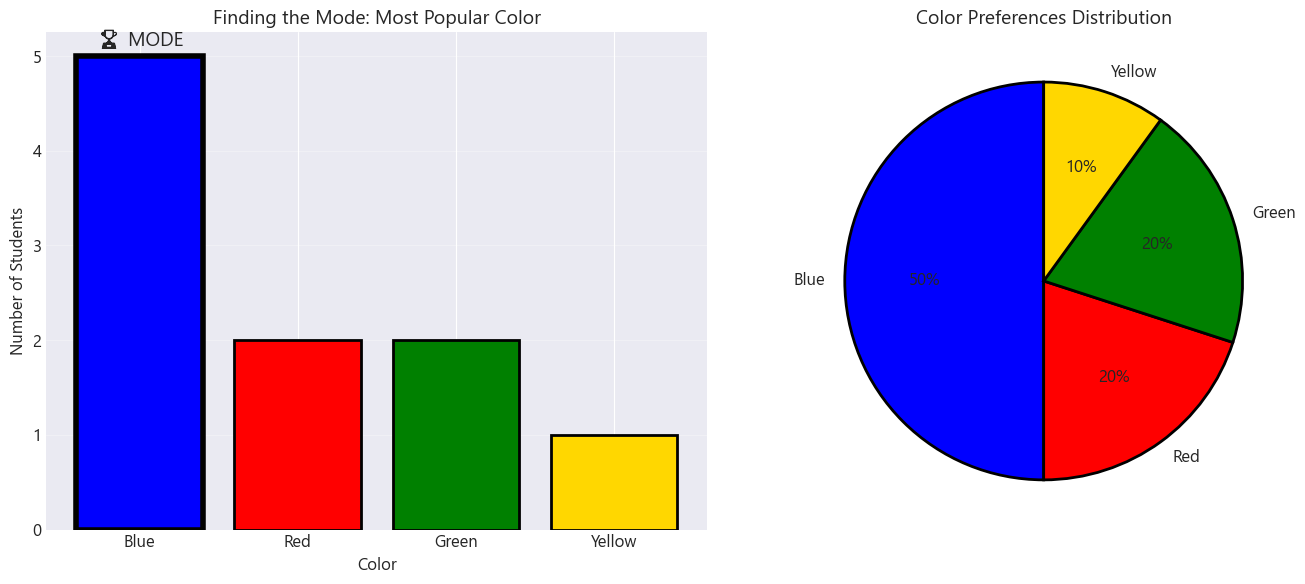

In [105]:
# Mode example: Favorite colors in a class
colors = ['Blue', 'Red', 'Blue', 'Green', 'Blue', 'Red', 'Yellow', 'Blue', 'Green', 'Blue']

# Count occurrences
from collections import Counter
color_counts = Counter(colors)
mode_color = max(color_counts, key=color_counts.get)

print("🎨 Students' Favorite Colors:", colors)
print(f"\n🏆 Mode (Most Popular): {mode_color}")
print("\nColor Counts:")
for color, count in sorted(color_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"  {color}: {'⭐' * count} ({count})")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart
colors_list = list(color_counts.keys())
counts = list(color_counts.values())
bar_colors = {'Blue': 'blue', 'Red': 'red', 'Green': 'green', 'Yellow': 'gold'}

bars = ax1.bar(colors_list, counts, color=[bar_colors.get(c, 'gray') for c in colors_list], 
                edgecolor='black', linewidth=2)

# Highlight the mode
max_count_idx = counts.index(max(counts))
bars[max_count_idx].set_linewidth(4)
bars[max_count_idx].set_edgecolor('black')
ax1.text(max_count_idx, counts[max_count_idx] + 0.1, '🏆 MODE', 
         ha='center', fontsize=14, fontweight='bold')

ax1.set_xlabel('Color', fontsize=12)
ax1.set_ylabel('Number of Students', fontsize=12)
ax1.set_title('Finding the Mode: Most Popular Color', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Pie chart
ax2.pie(counts, labels=colors_list, colors=[bar_colors.get(c, 'gray') for c in colors_list],
        autopct='%1.0f%%', startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 2})
ax2.set_title('Color Preferences Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


### 🎭 When to Use Which Measure?


💰 Employee Incomes (in thousands): [30, 35, 40, 45, 50, 55, 60, 300]

🎯 Mean: $76.9k
🏃 Median: $47.5k
🏆 Mode: No repeated values (each income appears once)


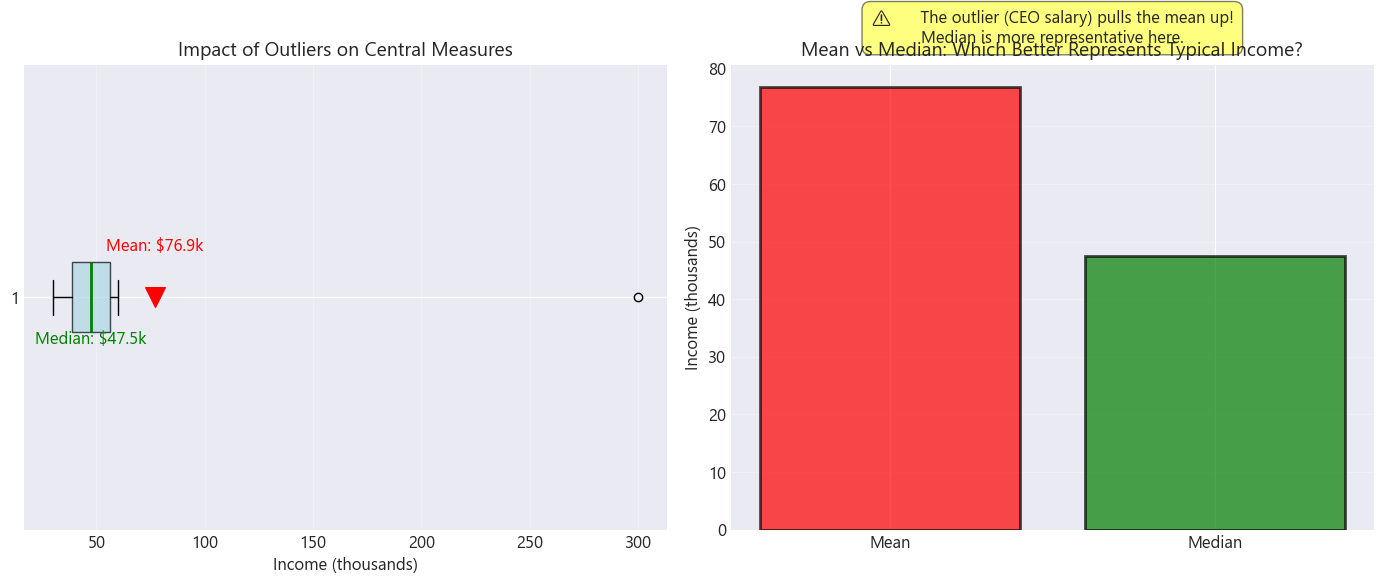

In [106]:

# Let's see how outliers affect different measures
# Example: Income in a small company (in thousands)
incomes = [30, 35, 40, 45, 50, 55, 60, 300]  # Note the CEO's salary!

mean_income = np.mean(incomes)
median_income = np.median(incomes)
# mode_income = stats.mode(incomes)[0][0]
mode_income = pd.Series(incomes).mode().iloc[0]

print("💰 Employee Incomes (in thousands):", incomes)
print(f"\n🎯 Mean: ${mean_income:.1f}k")
print(f"🏃 Median: ${median_income:.1f}k") 
print(f"🏆 Mode: No repeated values (each income appears once)")

# Visualize the effect of outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Box plot
ax1.boxplot(incomes, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7),
            medianprops=dict(color='green', linewidth=2),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))
ax1.scatter([mean_income], [1], s=200, c='red', marker='v', zorder=5)
ax1.text(mean_income, 1.1, f'Mean: ${mean_income:.1f}k', ha='center', color='red', fontweight='bold')
ax1.text(median_income, 0.9, f'Median: ${median_income:.1f}k', ha='center', color='green', fontweight='bold')
ax1.set_xlabel('Income (thousands)')
ax1.set_title('Impact of Outliers on Central Measures', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Comparison
ax2.bar(['Mean', 'Median'], [mean_income, median_income], 
        color=['red', 'green'], alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_ylabel('Income (thousands)')
ax2.set_title('Mean vs Median: Which Better Represents Typical Income?', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Add text explanation
ax2.text(0.5, max(mean_income, median_income) * 1.1, 
         '⚠️ The outlier (CEO salary) pulls the mean up!\nMedian is more representative here.',
         ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.5", facecolor="yellow", alpha=0.5))

plt.tight_layout()
plt.show()


### 📝 Practice Exercise 4: Central Tendency

Calculate the mean, median, and mode for the following dataset representing the number of books read by students in a month:


In [107]:
# Practice dataset
books_read = [2, 3, 2, 5, 4, 2, 3, 6, 4, 3, 2, 1, 4, 3, 5]

print("📚 Books read by students:", books_read)
print("\n🤔 Calculate:")
print("1. Mean = ?")
print("2. Median = ?")
print("3. Mode = ?")

# Try calculating these yourself first!
# Then uncomment the lines below to check your answers

# print("\n" + "="*40)
# print("✅ ANSWERS:")
# print(f"1. Mean = {np.mean(books_read):.2f} books")
# print(f"2. Median = {np.median(books_read)} books")
# print(f"3. Mode = {stats.mode(books_read)[0][0]} books (most common)")

# # Bonus: Create a visualization
# plt.figure(figsize=(10, 6))
# plt.hist(books_read, bins=range(0, 8), align='left', rwidth=0.8, 
#          color='lightcoral', edgecolor='black')
# plt.axvline(np.mean(books_read), color='red', linestyle='--', 
#             linewidth=2, label=f'Mean: {np.mean(books_read):.2f}')
# plt.axvline(np.median(books_read), color='green', linestyle='--', 
#             linewidth=2, label=f'Median: {np.median(books_read)}')
# plt.axvline(stats.mode(books_read)[0][0], color='orange', linestyle='--', 
#             linewidth=2, label=f'Mode: {stats.mode(books_read)[0][0]}')
# plt.xlabel('Number of Books')
# plt.ylabel('Number of Students')
# plt.title('Distribution of Books Read by Students', fontsize=14, fontweight='bold')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.show()


📚 Books read by students: [2, 3, 2, 5, 4, 2, 3, 6, 4, 3, 2, 1, 4, 3, 5]

🤔 Calculate:
1. Mean = ?
2. Median = ?
3. Mode = ?


In [ ]:
a = [2,2,4,4,3]  # range = 2



## 5. 📐 Measures of Dispersion (Spread)

While central tendency tells us about the "typical" value, **dispersion** tells us how spread out our data is. It's like asking: "Are all students scoring similarly, or are their scores all over the place?"

Key measures:
- **Range** - The simplest measure
- **Variance** - Average squared distance from mean
- **Standard Deviation** - Square root of variance (most commonly used)


### 🧮 Formulas: Variance and Standard Deviation

#### Symbols
- Population size: \(N\)
- Sample size: \(n\)
- Population mean: \(\mu\)
- Sample mean: \(\bar{x}\)
- Data values: \(x_1, x_2, \dots, x_n\)

#### Population variance (sigma squared)
$$
\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2
$$

#### Sample variance (unbiased; Bessel's correction)
$$
 s^2 = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

#### Population standard deviation
$$
\sigma = \sqrt{\sigma^2}
$$

#### Sample standard deviation
$$
 s = \sqrt{s^2}
$$

#### Intuition
- Variance measures the average squared distance from the mean.
- Standard deviation is the spread in the same units as the data (easier to interpret).


📊 Class A scores: [72, 73, 74, 75, 76, 77, 78, 77, 76, 75]
   Mean: 75.3, Range: 6, Std Dev: 1.79

📊 Class B scores: [50, 60, 70, 75, 80, 85, 90, 95, 85, 60]
   Mean: 75.0, Range: 45, Std Dev: 13.96

🤔 Notice: Same mean, but very different spread!


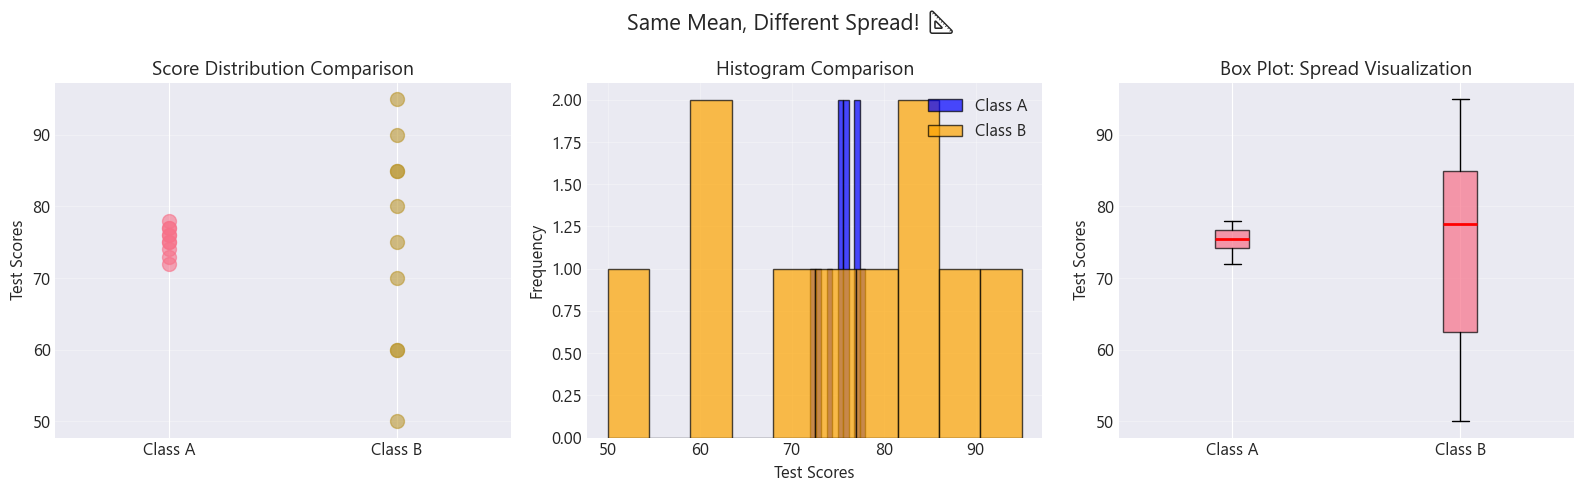

In [108]:
# Let's compare two classes with same mean but different spread
np.random.seed(42)

# Class A: Consistent scores (low spread)
class_a = [72, 73, 74, 75, 76, 77, 78, 77, 76, 75]
# Class B: Varied scores (high spread)  
class_b = [50, 60, 70, 75, 80, 85, 90, 95, 85, 60]

# Calculate statistics
stats_a = {
    'Mean': np.mean(class_a),
    'Range': max(class_a) - min(class_a),
    'Variance': np.var(class_a),
    'Std Dev': np.std(class_a)
}

stats_b = {
    'Mean': np.mean(class_b),
    'Range': max(class_b) - min(class_b),
    'Variance': np.var(class_b),
    'Std Dev': np.std(class_b)
}

print("📊 Class A scores:", class_a)
print(f"   Mean: {stats_a['Mean']:.1f}, Range: {stats_a['Range']}, Std Dev: {stats_a['Std Dev']:.2f}")
print("\n📊 Class B scores:", class_b)
print(f"   Mean: {stats_b['Mean']:.1f}, Range: {stats_b['Range']}, Std Dev: {stats_b['Std Dev']:.2f}")
print("\n🤔 Notice: Same mean, but very different spread!")

# Visualize the difference
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

# Scatter plots
ax1.scatter([1]*len(class_a), class_a, s=100, alpha=0.6, label='Class A')
ax1.scatter([2]*len(class_b), class_b, s=100, alpha=0.6, label='Class B')
ax1.set_xlim(0.5, 2.5)
ax1.set_xticks([1, 2])
ax1.set_xticklabels(['Class A', 'Class B'])
ax1.set_ylabel('Test Scores')
ax1.set_title('Score Distribution Comparison', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Histograms
ax2.hist(class_a, bins=10, alpha=0.7, color='blue', edgecolor='black', label='Class A')
ax2.hist(class_b, bins=10, alpha=0.7, color='orange', edgecolor='black', label='Class B')
ax2.set_xlabel('Test Scores')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram Comparison', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Box plots
ax3.boxplot([class_a, class_b], labels=['Class A', 'Class B'], 
            patch_artist=True, boxprops=dict(alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
ax3.set_ylabel('Test Scores')
ax3.set_title('Box Plot: Spread Visualization', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

plt.suptitle('Same Mean, Different Spread! 📐', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


### 📏 Range

**Range** is the simplest measure of spread. It's just the difference between the highest and lowest values.

**Formula:** Range = Maximum value - Minimum value


🌡️ Daily temperatures (°C): [22, 24, 19, 25, 28, 30, 18, 26, 23, 27]

Minimum: 18°C
Maximum: 30°C
Range: 30 - 18 = 12°C


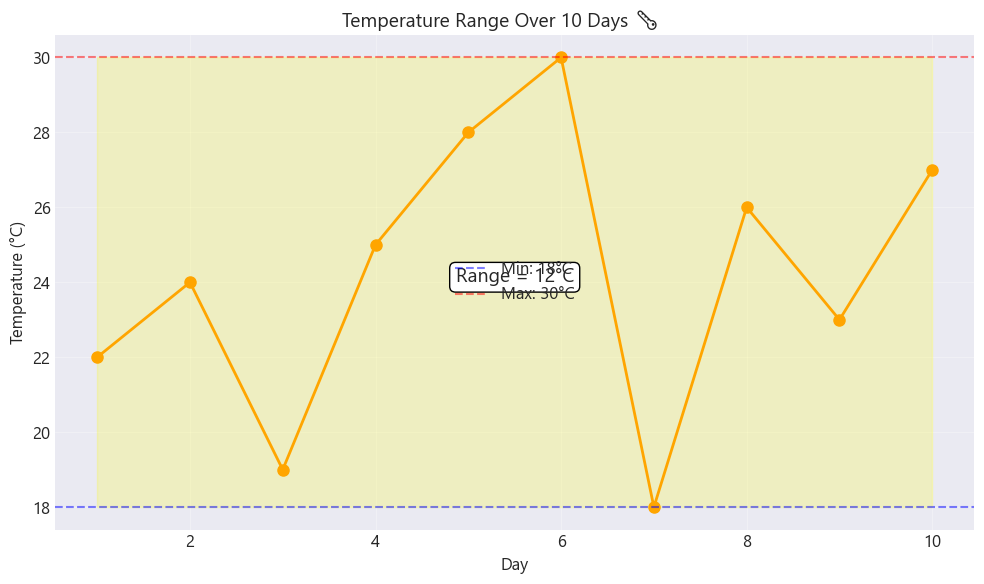

In [109]:
# Range example
temperatures = [22, 24, 19, 25, 28, 30, 18, 26, 23, 27]

min_temp = min(temperatures)
max_temp = max(temperatures)
temp_range = max_temp - min_temp

print(f"🌡️ Daily temperatures (°C): {temperatures}")
print(f"\nMinimum: {min_temp}°C")
print(f"Maximum: {max_temp}°C")
print(f"Range: {max_temp} - {min_temp} = {temp_range}°C")

# Visualize range
plt.figure(figsize=(10, 6))
days = list(range(1, len(temperatures) + 1))
plt.plot(days, temperatures, 'o-', linewidth=2, markersize=8, color='orange')

# Highlight min and max
plt.axhline(min_temp, color='blue', linestyle='--', alpha=0.5, label=f'Min: {min_temp}°C')
plt.axhline(max_temp, color='red', linestyle='--', alpha=0.5, label=f'Max: {max_temp}°C')

# Show range
plt.fill_between(days, min_temp, max_temp, alpha=0.2, color='yellow')
plt.text(5.5, (min_temp + max_temp)/2, f'Range = {temp_range}°C', 
         ha='center', fontsize=14, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black"))

plt.xlabel('Day', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Temperature Range Over 10 Days 🌡️', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 📊 Variance

**Variance** measures how far each data point is from the mean, on average. It's calculated by:
1. Finding the difference between each value and the mean
2. Squaring these differences (to make them positive)
3. Taking the average of these squared differences


📊 Step-by-step Variance Calculation
Data: [2, 4, 6, 8, 10]
Mean: 6.0

Step 1 - Differences from mean:
  2 - 6.0 = -4.0
  4 - 6.0 = -2.0
  6 - 6.0 = 0.0
  8 - 6.0 = 2.0
  10 - 6.0 = 4.0

Step 2 - Square the differences:
  (-4.0)² = 16.0
  (-2.0)² = 4.0
  (0.0)² = 0.0
  (2.0)² = 4.0
  (4.0)² = 16.0

Step 3 - Average of squared differences:
  (16.0 + 4.0 + 0.0 + 4.0 + 16.0) / 5 = 8.0

✅ Variance = 8.0
✅ Verify with NumPy: 8.0


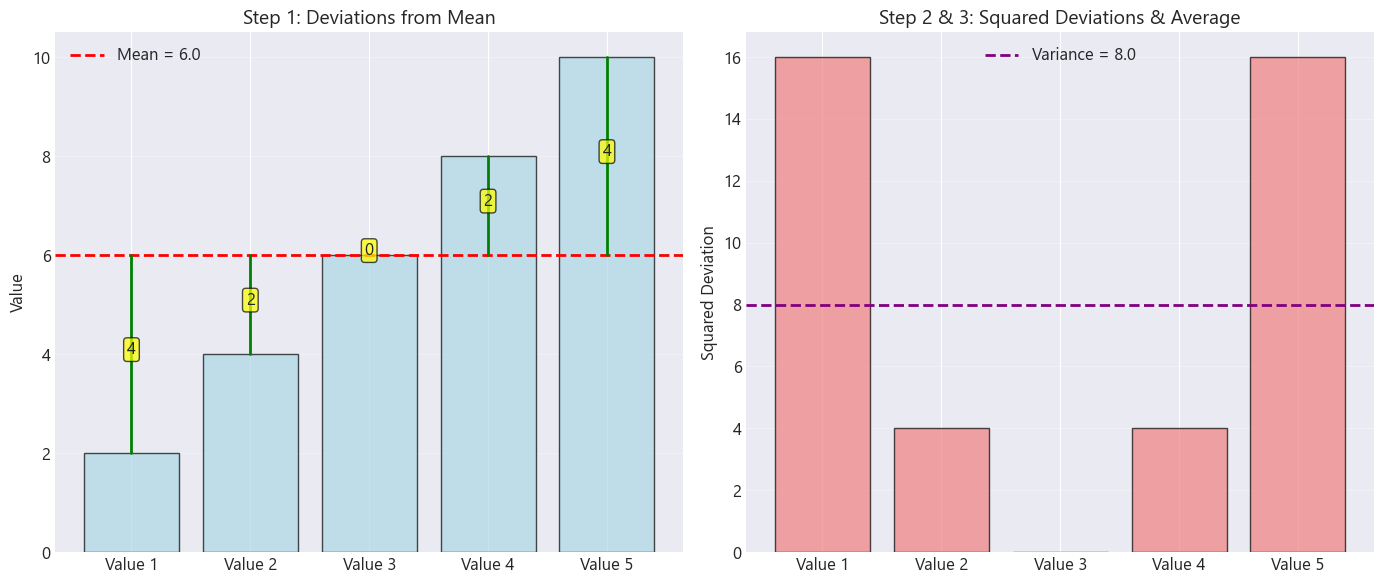

In [110]:
# Let's calculate variance step by step
data = [2, 4, 6, 8, 10]
mean = np.mean(data)

print("📊 Step-by-step Variance Calculation")
print(f"Data: {data}")
print(f"Mean: {mean}\n")

# Step 1: Calculate differences from mean
differences = [x - mean for x in data]
print("Step 1 - Differences from mean:")
for i, (val, diff) in enumerate(zip(data, differences)):
    print(f"  {val} - {mean} = {diff}")

# Step 2: Square the differences
squared_diffs = [d**2 for d in differences]
print("\nStep 2 - Square the differences:")
for i, (diff, sq) in enumerate(zip(differences, squared_diffs)):
    print(f"  ({diff})² = {sq}")

# Step 3: Calculate average
variance = np.mean(squared_diffs)
print(f"\nStep 3 - Average of squared differences:")
print(f"  ({' + '.join(map(str, squared_diffs))}) / {len(squared_diffs)} = {variance}")

print(f"\n✅ Variance = {variance}")
print(f"✅ Verify with NumPy: {np.var(data)}")

# Visualize the concept
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left: Show deviations
x_pos = np.arange(len(data))
ax1.bar(x_pos, data, color='lightblue', edgecolor='black', alpha=0.7)
ax1.axhline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean}')

# Draw deviation lines
for i, (pos, val) in enumerate(zip(x_pos, data)):
    ax1.plot([pos, pos], [mean, val], 'g-', linewidth=2)
    ax1.text(pos, (mean + val)/2, f'{abs(val-mean):.0f}', ha='center', 
             bbox=dict(boxstyle="round,pad=0.2", facecolor="yellow", alpha=0.7))

ax1.set_xticks(x_pos)
ax1.set_xticklabels([f'Value {i+1}' for i in range(len(data))])
ax1.set_ylabel('Value')
ax1.set_title('Step 1: Deviations from Mean', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Right: Show squared deviations
ax2.bar(x_pos, squared_diffs, color='lightcoral', edgecolor='black', alpha=0.7)
ax2.axhline(variance, color='purple', linestyle='--', linewidth=2, 
            label=f'Variance = {variance}')
ax2.set_xticks(x_pos)
ax2.set_xticklabels([f'Value {i+1}' for i in range(len(data))])
ax2.set_ylabel('Squared Deviation')
ax2.set_title('Step 2 & 3: Squared Deviations & Average', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


### 📝 Practice Exercise 5: Calculating Dispersion

Calculate the range and variance for this dataset of daily study hours:


In [118]:
data = [3,5,5,5,6,7,7,7,8,9]

# Calculate variance
variance = np.var(data)
# Calculate standard deviation
std_deviation = np.std(data)

print(f"Variance: {variance}")
print(f"Standard Deviation: {std_deviation}")


Variance: 2.7600000000000002
Standard Deviation: 1.661324772583615


In [111]:
# Practice dataset
study_hours = [1, 2, 2, 3, 3, 3, 4, 4, 5, 8]

print("📚 Daily study hours:", study_hours)
print("\n🤔 Calculate:")
print("1. Range = ?")
print("2. Mean = ?")
print("3. Variance = ?")

# Try calculating these yourself first!
# Then uncomment the lines below to check

# print("\n" + "="*40)
# print("✅ ANSWERS:")
# print(f"1. Range = {max(study_hours) - min(study_hours)} hours")
# print(f"2. Mean = {np.mean(study_hours):.2f} hours")
# print(f"3. Variance = {np.var(study_hours):.2f}")

# # Bonus visualization
# plt.figure(figsize=(10, 6))
# plt.scatter(range(len(study_hours)), study_hours, s=100, color='purple', alpha=0.6)
# plt.axhline(np.mean(study_hours), color='red', linestyle='--', 
#             label=f'Mean: {np.mean(study_hours):.2f}')
# plt.xlabel('Day')
# plt.ylabel('Study Hours')
# plt.title('Daily Study Hours Distribution', fontsize=14, fontweight='bold')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.show()


📚 Daily study hours: [1, 2, 2, 3, 3, 3, 4, 4, 5, 8]

🤔 Calculate:
1. Range = ?
2. Mean = ?
3. Variance = ?


## 6. 🔬 Bessel's Correction: Why We Divide by (n-1)

This is a common question: When calculating **sample variance**, why do we divide by (n-1) instead of n? 

This adjustment is called **Bessel's Correction**, and here's the intuition behind it!


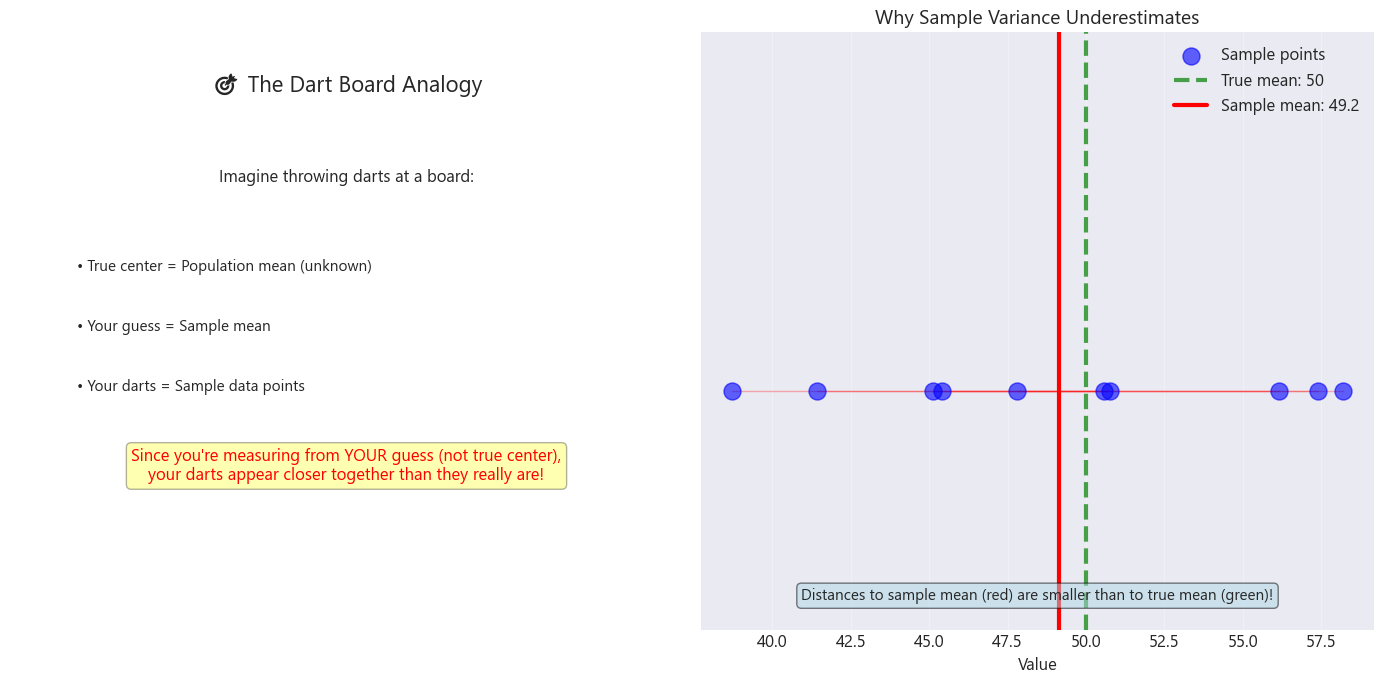

In [112]:
# Let's understand with a simple analogy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Left: The problem illustrated
ax1.text(0.5, 0.9, "🎯 The Dart Board Analogy", ha='center', fontsize=16, 
         fontweight='bold', transform=ax1.transAxes)
ax1.text(0.5, 0.75, "Imagine throwing darts at a board:", ha='center', 
         fontsize=12, transform=ax1.transAxes)
ax1.text(0.1, 0.6, "• True center = Population mean (unknown)", ha='left', 
         fontsize=11, transform=ax1.transAxes)
ax1.text(0.1, 0.5, "• Your guess = Sample mean", ha='left', 
         fontsize=11, transform=ax1.transAxes)
ax1.text(0.1, 0.4, "• Your darts = Sample data points", ha='left', 
         fontsize=11, transform=ax1.transAxes)
ax1.text(0.5, 0.25, "Since you're measuring from YOUR guess (not true center),\n" +
         "your darts appear closer together than they really are!", 
         ha='center', fontsize=12, style='italic', color='red',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.3),
         transform=ax1.transAxes)
ax1.axis('off')

# Right: Visual demonstration
# Generate sample data
np.random.seed(42)
true_mean = 50
sample_size = 10
population = np.random.normal(true_mean, 10, 1000)
sample = np.random.choice(population, sample_size, replace=False)
sample_mean = np.mean(sample)

# Plot
ax2.scatter(sample, [1]*len(sample), s=150, c='blue', alpha=0.6, 
           label='Sample points', zorder=3)
ax2.axvline(true_mean, color='green', linestyle='--', linewidth=3, 
           label=f'True mean: {true_mean}', alpha=0.7)
ax2.axvline(sample_mean, color='red', linestyle='-', linewidth=3, 
           label=f'Sample mean: {sample_mean:.1f}')

# Show distances
for point in sample:
    ax2.plot([point, sample_mean], [1, 1], 'r-', alpha=0.3, linewidth=1)
    
ax2.set_ylim(0.8, 1.3)
ax2.set_xlabel('Value', fontsize=12)
ax2.set_title('Why Sample Variance Underestimates', fontsize=14, fontweight='bold')
ax2.text(0.5, 0.05, 'Distances to sample mean (red) are smaller than to true mean (green)!',
         ha='center', transform=ax2.transAxes, fontsize=11,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.5))
ax2.legend()
ax2.grid(True, alpha=0.3, axis='x')
ax2.set_yticks([])

plt.tight_layout()
plt.show()


### 🔢 The Mathematical Intuition


📊 Sample data: [10, 12, 14, 16, 18]
Sample size (n): 5
Sample mean: 14.0

🔴 Biased variance (÷n): 8.0
🟢 Unbiased variance (÷n-1): 10.0

📈 Correction factor: 1.250x larger


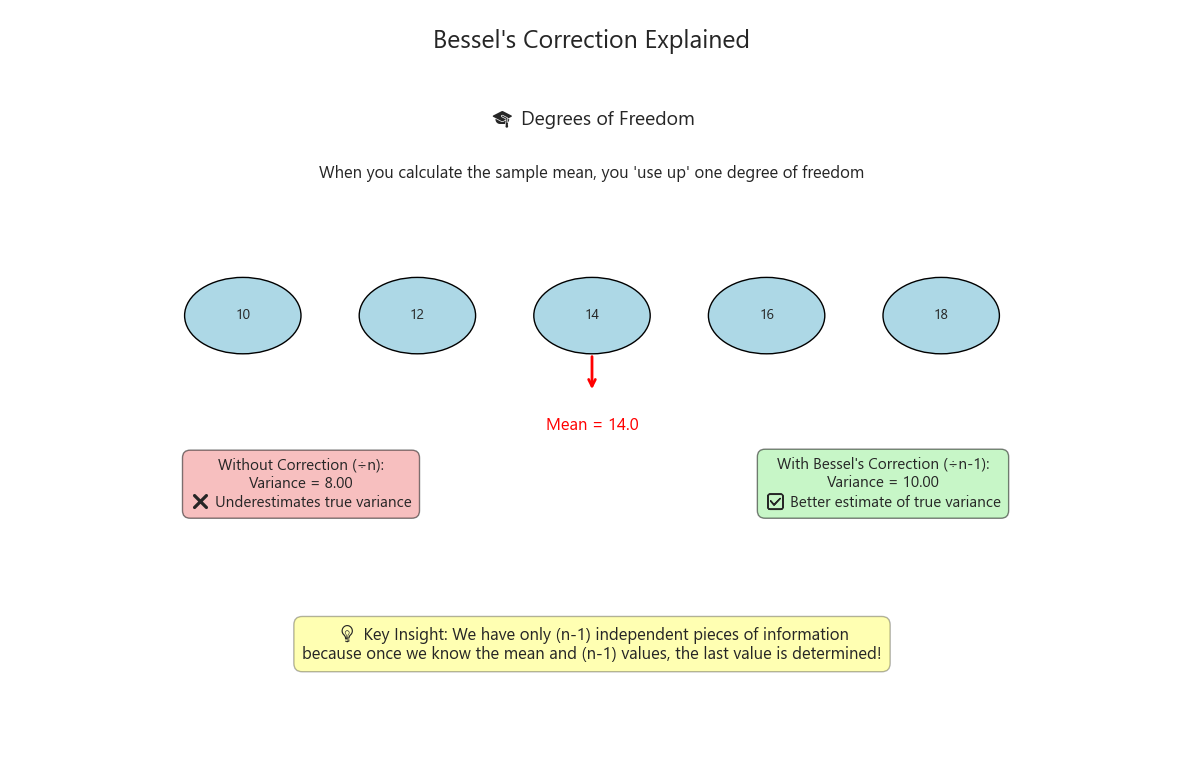

In [113]:
# Let's see the difference between dividing by n and (n-1)
sample_data = [10, 12, 14, 16, 18]
n = len(sample_data)
mean = np.mean(sample_data)

# Calculate both versions
squared_diffs = [(x - mean)**2 for x in sample_data]
variance_n = sum(squared_diffs) / n  # Biased (dividing by n)
variance_n_minus_1 = sum(squared_diffs) / (n - 1)  # Unbiased (dividing by n-1)

print("📊 Sample data:", sample_data)
print(f"Sample size (n): {n}")
print(f"Sample mean: {mean}")
print(f"\n🔴 Biased variance (÷n): {variance_n}")
print(f"🟢 Unbiased variance (÷n-1): {variance_n_minus_1}")
print(f"\n📈 Correction factor: {variance_n_minus_1 / variance_n:.3f}x larger")

# Visualize the concept
fig, ax = plt.subplots(figsize=(12, 8))

# Create infographic
ax.text(0.5, 0.95, "Bessel's Correction Explained", ha='center', fontsize=18, 
        fontweight='bold', transform=ax.transAxes)

# Degrees of freedom explanation
ax.text(0.5, 0.85, "🎓 Degrees of Freedom", ha='center', fontsize=14, 
        fontweight='bold', transform=ax.transAxes)
ax.text(0.5, 0.78, "When you calculate the sample mean, you 'use up' one degree of freedom", 
        ha='center', fontsize=12, transform=ax.transAxes)

# Visual representation
y_pos = 0.6
for i in range(n):
    circle = plt.Circle((0.2 + i*0.15, y_pos), 0.05, color='lightblue', 
                       ec='black', transform=ax.transAxes)
    ax.add_patch(circle)
    ax.text(0.2 + i*0.15, y_pos, f'{sample_data[i]}', ha='center', va='center',
            transform=ax.transAxes, fontsize=10)

# Arrow pointing to mean
ax.annotate('', xy=(0.5, y_pos-0.1), xytext=(0.5, y_pos-0.05),
            arrowprops=dict(arrowstyle='->', lw=2, color='red'),
            transform=ax.transAxes)
ax.text(0.5, y_pos-0.15, f'Mean = {mean}', ha='center', fontsize=12,
        transform=ax.transAxes, color='red', fontweight='bold')

# Explanation boxes
ax.text(0.25, 0.35, "Without Correction (÷n):\n" + 
        f"Variance = {variance_n:.2f}\n" +
        "❌ Underestimates true variance",
        ha='center', fontsize=11, 
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightcoral", alpha=0.5),
        transform=ax.transAxes)

ax.text(0.75, 0.35, "With Bessel's Correction (÷n-1):\n" + 
        f"Variance = {variance_n_minus_1:.2f}\n" +
        "✅ Better estimate of true variance",
        ha='center', fontsize=11,
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.5),
        transform=ax.transAxes)

# Key insight
ax.text(0.5, 0.15, "💡 Key Insight: We have only (n-1) independent pieces of information\n" +
        "because once we know the mean and (n-1) values, the last value is determined!",
        ha='center', fontsize=12, style='italic',
        bbox=dict(boxstyle="round,pad=0.5", facecolor="yellow", alpha=0.3),
        transform=ax.transAxes)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
plt.tight_layout()
plt.show()


### 📝 Practice Exercise 6: Population vs Sample Variance

Compare the population variance and sample variance for this dataset:


Values: [5, 7, 7, 8, 10]
Mean: 7.40
Population variance (÷n): 2.6400
Sample variance (÷n-1): 3.3000
Ratio (sample/pop): 1.250


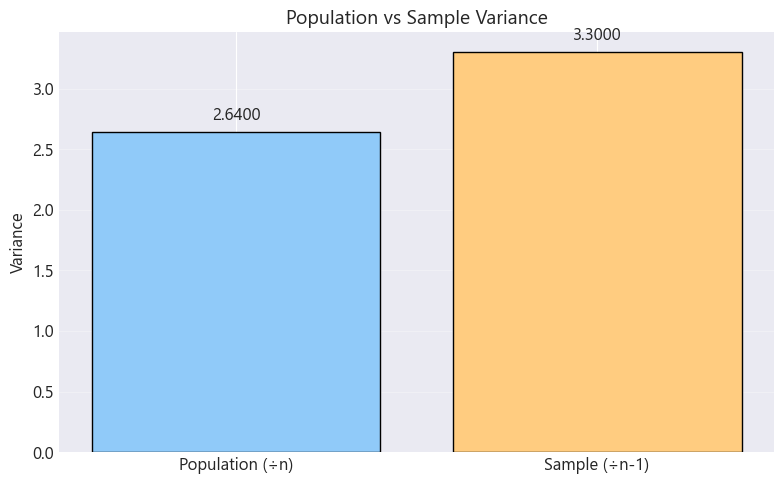

In [114]:
# Practice: Compare population vs sample variance
values = [5, 7, 7, 8, 10]

n = len(values)
mean_val = np.mean(values)
sq_diffs = [(x - mean_val)**2 for x in values]

pop_variance = sum(sq_diffs) / n              # divide by n
sample_variance = sum(sq_diffs) / (n - 1)     # divide by (n-1)

print("Values:", values)
print(f"Mean: {mean_val:.2f}")
print(f"Population variance (÷n): {pop_variance:.4f}")
print(f"Sample variance (÷n-1): {sample_variance:.4f}")
print(f"Ratio (sample/pop): {sample_variance/pop_variance:.3f}")

# Visualize the difference
labels = ['Population (÷n)', 'Sample (÷n-1)']
vals = [pop_variance, sample_variance]
colors = ['#90CAF9', '#FFCC80']

plt.figure(figsize=(8,5))
plt.bar(labels, vals, color=colors, edgecolor='black')
plt.title("Population vs Sample Variance", fontsize=14, fontweight='bold')
plt.ylabel('Variance')
for i, v in enumerate(vals):
    plt.text(i, v + (max(vals)*0.03), f"{v:.4f}", ha='center', fontweight='bold')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## 7. 📉 Standard Deviation: How Much Do Values Vary?

Standard deviation (SD) tells us how spread out the data is around the mean. 
- Small SD: Values are close to the mean (consistent)
- Large SD: Values are far from the mean (variable)

We’ll explore SD with visuals, code, and intuition.


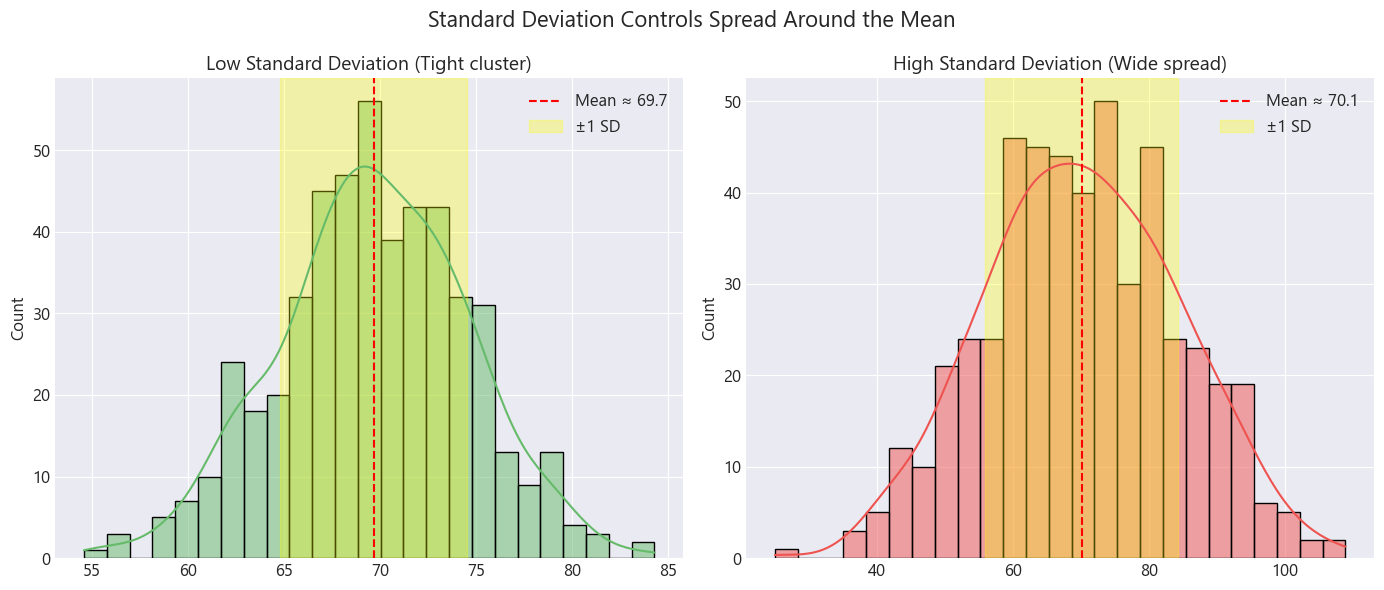

Low SD ≈ 4.88 | High SD ≈ 14.20


In [115]:
# Compare low vs high standard deviation
np.random.seed(7)

mean = 70
low_sd = 5
high_sd = 15

low_spread = np.random.normal(mean, low_sd, 500)
high_spread = np.random.normal(mean, high_sd, 500)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Low SD
sns.histplot(low_spread, bins=25, kde=True, ax=axes[0], color='#66BB6A', edgecolor='black')
axes[0].axvline(np.mean(low_spread), color='red', linestyle='--', label=f"Mean ≈ {np.mean(low_spread):.1f}")
axes[0].axvspan(np.mean(low_spread)-np.std(low_spread), np.mean(low_spread)+np.std(low_spread),
                color='yellow', alpha=0.3, label='±1 SD')
axes[0].set_title('Low Standard Deviation (Tight cluster)', fontsize=14, fontweight='bold')
axes[0].legend()

# High SD
sns.histplot(high_spread, bins=25, kde=True, ax=axes[1], color='#EF5350', edgecolor='black')
axes[1].axvline(np.mean(high_spread), color='red', linestyle='--', label=f"Mean ≈ {np.mean(high_spread):.1f}")
axes[1].axvspan(np.mean(high_spread)-np.std(high_spread), np.mean(high_spread)+np.std(high_spread),
                color='yellow', alpha=0.3, label='±1 SD')
axes[1].set_title('High Standard Deviation (Wide spread)', fontsize=14, fontweight='bold')
axes[1].legend()

plt.suptitle('Standard Deviation Controls Spread Around the Mean', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Low SD ≈ {np.std(low_spread):.2f} | High SD ≈ {np.std(high_spread):.2f}")


### 📐 Standard Deviation Formula (Beginner-friendly)

- Step 1: Find the mean (average)
- Step 2: Find each value's distance from the mean
- Step 3: Square those distances
- Step 4: Average them (variance)
- Step 5: Take the square root (standard deviation)

We’ll code this now.


Values: [60, 65, 70, 75, 80]
Mean: 70.00
Differences from mean: [np.float64(-10.0), np.float64(-5.0), np.float64(0.0), np.float64(5.0), np.float64(10.0)]
Squared differences: [np.float64(100.0), np.float64(25.0), np.float64(0.0), np.float64(25.0), np.float64(100.0)]
Variance: 50.00
Standard Deviation: 7.07
✔️ NumPy check: 7.07


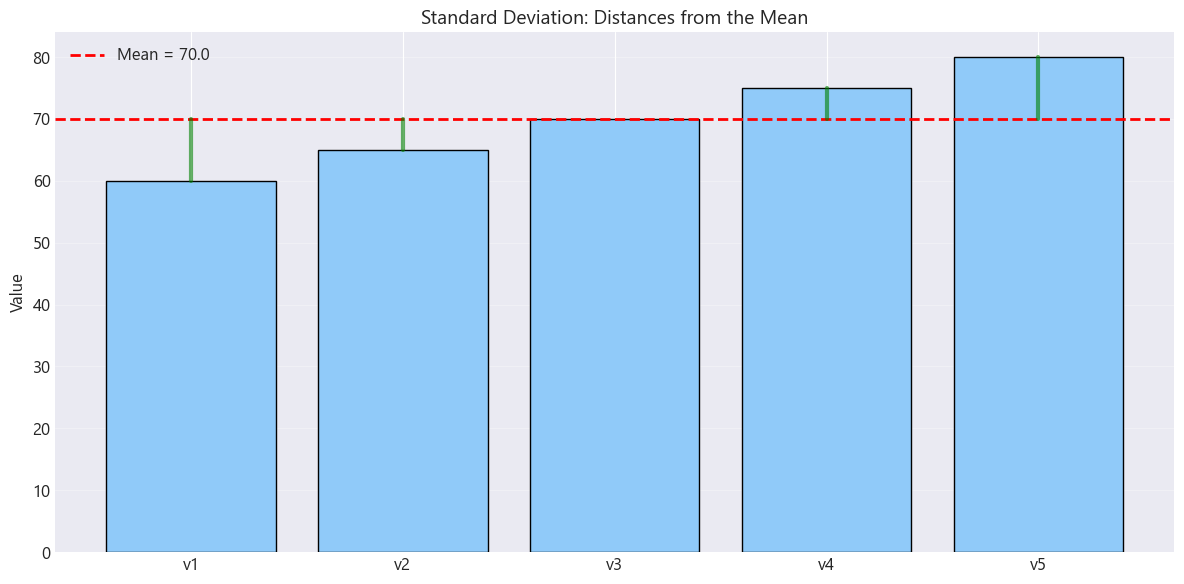

In [116]:
# Compute SD step-by-step and compare
values = [60, 65, 70, 75, 80]

# Steps
mean_val = np.mean(values)
diffs = [x - mean_val for x in values]
sq_diffs = [d**2 for d in diffs]
variance = np.mean(sq_diffs)
std_dev = np.sqrt(variance)

print("Values:", values)
print(f"Mean: {mean_val:.2f}")
print("Differences from mean:", [round(d,2) for d in diffs])
print("Squared differences:", [round(s,2) for s in sq_diffs])
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"✔️ NumPy check: {np.std(values):.2f}")

# Visualize
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(range(len(values)), values, color='#90CAF9', edgecolor='black')
ax.axhline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_val:.1f}")

for i, v in enumerate(values):
    ax.plot([i, i], [mean_val, v], color='green', linewidth=3, alpha=0.6)

ax.set_xticks(range(len(values)))
ax.set_xticklabels([f"v{i+1}" for i in range(len(values))])
ax.set_ylabel('Value')
ax.set_title('Standard Deviation: Distances from the Mean', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [117]:
# Interactive: Adjust standard deviation and see the curve change
import ipywidgets as widgets
from IPython.display import display

@widgets.interact(mean=(0, 100, 1), sd=(1, 30, 1))
def plot_normal(mean=70, sd=10):
    x = np.linspace(mean - 4*sd, mean + 4*sd, 400)
    y = stats.norm.pdf(x, mean, sd)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x, y, color='purple', linewidth=3)
    ax.axvline(mean, color='red', linestyle='--', label='Mean')
    ax.axvspan(mean - sd, mean + sd, color='yellow', alpha=0.3, label='±1 SD (~68%)')
    ax.axvspan(mean - 2*sd, mean - sd, color='lightgreen', alpha=0.2, label='±2 SD (~95%)')
    ax.axvspan(mean + sd, mean + 2*sd, color='lightgreen', alpha=0.2)

    ax.set_title(f'Normal Curve (mean={mean}, sd={sd})', fontsize=14, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


interactive(children=(IntSlider(value=70, description='mean'), IntSlider(value=10, description='sd', max=30, m…

### 📝 Practice Exercise 7: Standard Deviation

1) Create a list of 12 daily step counts. Compute mean, variance, and SD.
2) Plot a histogram and shade the ±1 SD region.
3) If one day you walked double the mean, how does SD change?
